
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1    0.719500                4.242439          2161.425209   
2    0.710486                4.174343          2168.238915   
3    0.666106                4.126144          2167.779119   
4    0.675145                4.120736          2166.974740   
5    0.776831                4.120331          2166.384674   
..        ...                     ...                  ...   
978  0.762500                4.204430          2169.361647   
979  0.646000                4.208539          2169.079601   
980  0.654667                4.212648          2168.797556   
981  0.591667                4.217784          2168.444999   
982  0.724667                4.223948          2167.967389   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1              9306.840913   184.818611                    0.0           0.0   
2              9336.364456   185.993447                    0.0           0.0   
3              9419.200115   185.828474                    0.0           0.0   
4              9564.165802   185.924481                    0.0           0.0   
5              9648.247637   185.942943                    0.0           0.0   
..                     ...          ...                    ...           ...   
978            9297.484543   185.046491                    0.0           0.0   
979            9312.779010   185.053796                    0.0           0.0   
980            9303.753420   185.007919                    0.0           0.0   
981            9333.448101   184.942435                    0.0           0.0   
982            9321.819731   184.863855                    0.0           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1             0.354        0.16  44562.0     2.0  168.666667   
2             0.313        0.83  44562.0     6.0  137.450000   
3             0.360        0.10  44562.0     7.0  156.684211   
4             0.319        0.34  44562.0     8.0  150.869919   
5             0.335        0.28  44562.0     9.0  160.218182   
..              ...         ...      ...     ...         ...   
978           0.343        0.30  44561.0  4344.0  147.500000   
979           0.324        0.30  44561.0  4345.0  147.500000   
980           0.325        0.16  44561.0  4346.0  174.000000   
981           0.335        0.26  44561.0  4347.0  160.000000   
982           0.328        1.08  44561.0  4348.0  149.333333   

     Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1              21.080431             18.313322             4.131228   
2              20.996415             18.311768             4.133911   
3              20.749627             18.341701             4.137632   
4              20.609259             18.644476             4.142824   
5              20.617383             18.845791             4.220690   
..                   ...                   ...                  ...   
978            21.039583             18.308225             4.129485   
979            21.043999             18.308776             4.129674   
980            21.048415             18.309327             4.129862   
981            21.053935             18.310016             4.130097   
982            21.060559             18.310842             4.130380   

     Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1              54.940123    171.769513    182.533770    148.126483   
2              55.072779    170.595469    183.725050    148.161842   
3              55.375043    167.017421    195.812061    147.562523   
4              55.341884    154.214917    188.028883    147.807509   
5              55.284451    156.234542    200.141261    149.014319   
..                   ...           ...           ...           ...   
978            55.162782    167.619915    185.900341    148.103530   
979            55.162767    164.706552    182.408576    148.106012   
980            55.140373    166.903493    181.6846

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 1 to 982
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    982 non-null    float64
 1   HOST_BLAST_MOISTURE_f3   982 non-null    float64
 2   HOT_BLAST_TMP_NS_f3      982 non-null    float64
 3   NAT_GAS _INJECTION_f3    982 non-null    float64
 4   WINDRATE_f3              982 non-null    float64
 5   HIGH_PURITY_OXYGEN_f3    982 non-null    float64
 6   COAL_FLOW_f3             982 non-null    float64
 7   Cast_Avg_Mn_f2           982 non-null    float64
 8   Slag_Fe_f2               982 non-null    float64
 9   date_f1                  982 non-null    float64
 10  CNUM                     982 non-null    float64
 11  LNUM_f1                  982 non-null    float64
 12  Selec_Top_Gas_CO_f3      982 non-null    float64
 13  Selec_Top_Gas_CO2_f3     982 non-null    float64
 14  Selec_Top_Gas_H2_f3      9

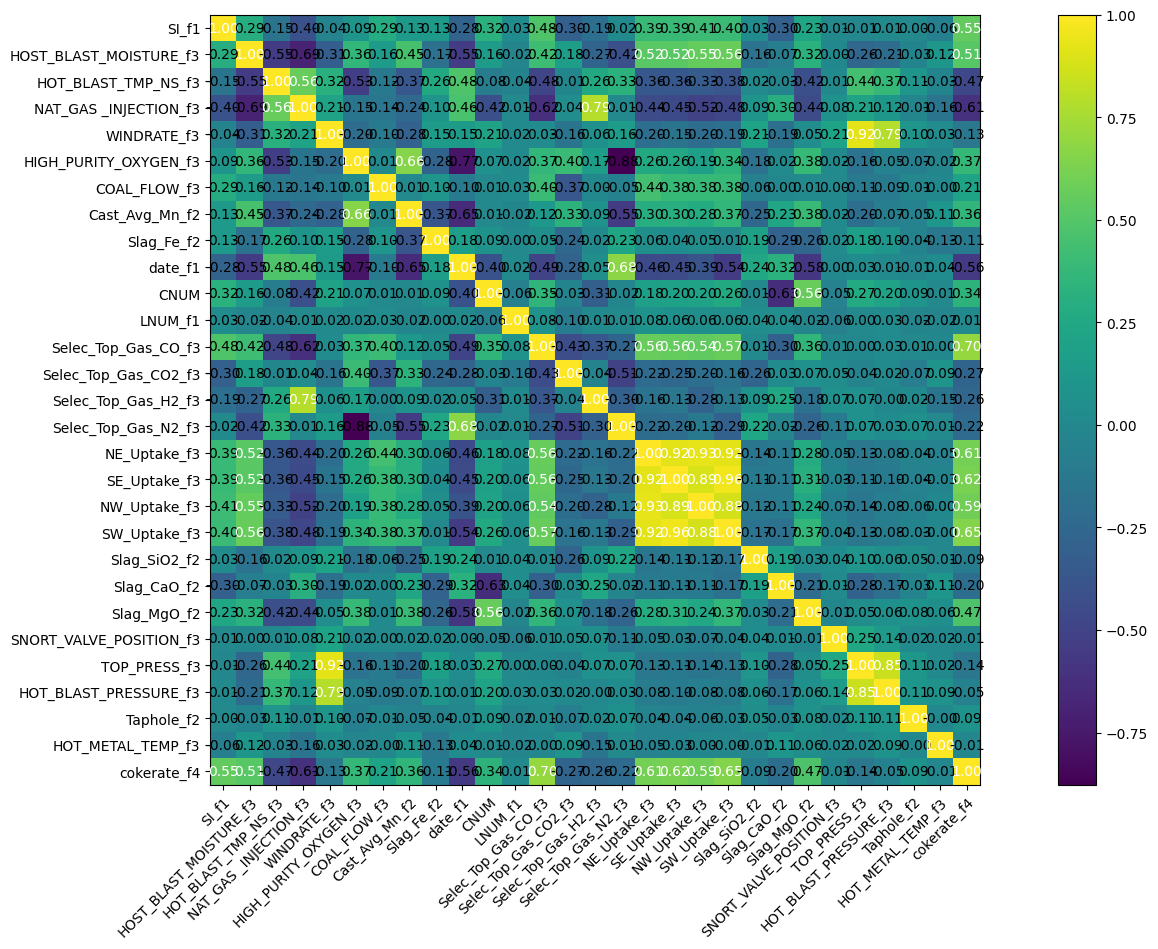

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1    0.719500  2022-01-01 00:45:00                4.242439   
2    0.710486  2022-01-01 08:43:00                4.174343   
3    0.666106  2022-01-01 10:17:00                4.126144   
4    0.675145  2022-01-01 12:40:00                4.120736   
5    0.776831  2022-01-01 15:06:00                4.120331   
..        ...                  ...                     ...   
978  0.762500  2021-12-31 13:10:00                4.204430   
979  0.646000  2021-12-31 14:41:00                4.208539   
980  0.654667  2021-12-31 16:15:00                4.212648   
981  0.591667  2021-12-31 17:40:00                4.217784   
982  0.724667  2021-12-31 19:31:00                4.223948   

     HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1            2161.425209            9306.840913   184.818611   
2            2168.238915            9336.364456   185.993447   
3            2167.779119            9419.200115   185.828474   
4            2166.974740            9564.165802   185.924481   
5            2166.384674            9648.247637   185.942943   
..                   ...                    ...          ...   
978          2169.361647            9297.484543   185.046491   
979          2169.079601            9312.779010   185.053796   
980          2168.797556            9303.753420   185.007919   
981          2168.444999            9333.448101   184.942435   
982          2167.967389            9321.819731   184.863855   

     HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1  \
1                      0.0           0.0           0.354        0.16  44562.0   
2                      0.0           0.0           0.313        0.83  44562.0   
3                      0.0           0.0           0.360        0.10  44562.0   
4                      0.0           0.0           0.319        0.34  44562.0   
5                      0.0           0.0           0.335        0.28  44562.0   
..                     ...           ...             ...         ...      ...   
978                    0.0           0.0           0.343        0.30  44561.0   
979                    0.0           0.0           0.324        0.30  44561.0   
980                    0.0           0.0           0.325        0.16  44561.0   
981                    0.0           0.0           0.335        0.26  44561.0   
982                    0.0           0.0           0.328        1.08  44561.0   

       CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1       2.0  168.666667            21.080431             18.313322   
2       6.0  137.450000            20.996415             18.311768   
3       7.0  156.684211            20.749627             18.341701   
4       8.0  150.869919            20.609259             18.644476   
5       9.0  160.218182            20.617383             18.845791   
..      ...         ...                  ...                   ...   
978  4344.0  147.500000            21.039583             18.308225   
979  4345.0  147.500000            21.043999             18.308776   
980  4346.0  174.000000            21.048415             18.309327   
981  4347.0  160.000000            21.053935             18.310016   
982  4348.0  149.333333            21.060559             18.310842   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1               4.131228            54.940123    171.769513    182.533770   
2               4.133911            55.072779    170.595469    183.725050   
3               4.137632            55.375043    167.017421    195.812061   
4               4.142824            55.341884    154.214917    188.028883   
5               4.220690            55.284451    156.234542    200.141261   
..                   ...                  ...           ...           ...   
978             4.129485            55.162782    167.619915    185.900341   
979             4.129674            55.162767    164.706552    1


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0    0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1    0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2   -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3    0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4    0.101686    0.000000  0.776831  2022-01-01 15:06:00   
..        ...         ...       ...                  ...   
977  0.109500    0.015206  0.762500  2021-12-31 13:10:00   
978 -0.116500   -0.005300  0.646000  2021-12-31 14:41:00   
979  0.008667   -0.033844  0.654667  2021-12-31 16:15:00   
980 -0.063000   -0.009337  0.591667  2021-12-31 17:40:00   
981  0.133000   -0.003391  0.724667  2021-12-31 19:31:00   

     HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                  4.242439          2161.425209            9306.840913   
1                  4.174343          2168.238915            9336.364456   
2                  4.126144          2167.779119            9419.200115   
3                  4.120736          2166.974740            9564.165802   
4                  4.120331          2166.384674            9648.247637   
..                      ...                  ...                    ...   
977                4.204430          2169.361647            9297.484543   
978                4.208539          2169.079601            9312.779010   
979                4.212648          2168.797556            9303.753420   
980                4.217784          2168.444999            9333.448101   
981                4.223948          2167.967389            9321.819731   

     WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0     184.818611                    0.0    0   45     0    1      1  2022   
1     185.993447                    0.0    0   43     8    1      1  2022   
2     185.828474                    0.0    0   17    10    1      1  2022   
3     185.924481                    0.0    0   40    12    1      1  2022   
4     185.942943                    0.0    0    6    15    1      1  2022   
..           ...                    ...  ...  ...   ...  ...    ...   ...   
977   185.046491                    0.0    0   10    13   31     12  2021   
978   185.053796                    0.0    0   41    14   31     12  2021   
979   185.007919                    0.0    0   15    16   31     12  2021   
980   184.942435                    0.0    0   40    17   31     12  2021   
981   184.863855                    0.0    0   31    19   31     12  2021   

     COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.0           0.354        0.16     2.0            21.080431   
1             0.0           0.313        0.83     6.0            20.996415   
2             0.0           0.360        0.10     7.0            20.749627   
3             0.0           0.319        0.34     8.0            20.609259   
4             0.0           0.335        0.28     9.0            20.617383   
..            ...             ...         ...     ...                  ...   
977           0.0           0.343        0.30  4344.0            21.039583   
978           0.0           0.324        0.30  4345.0            21.043999   
979           0.0           0.325        0.16  4346.0            21.048415   
980           0.0           0.335        0.26  4347.0            21.053935   
981           0.0           0.328        1.08  4348.0            21.060559   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.313322             4.131228            54.940123   
1               18.311768             4.133911            55.072779   
2               18.341701             4.137632            55.375043   
3               18.644476             4.142824            55.341884   
4               18.845791             4.220690            55.284451   
..                    ...                  ...                  ...   
977             18.30822

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0    0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1    0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2   -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3    0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4    0.101686    0.000000  0.776831  2022-01-01 15:06:00   
..        ...         ...       ...                  ...   
977  0.109500    0.015206  0.762500  2021-12-31 13:10:00   
978 -0.116500   -0.005300  0.646000  2021-12-31 14:41:00   
979  0.008667   -0.033844  0.654667  2021-12-31 16:15:00   
980 -0.063000   -0.009337  0.591667  2021-12-31 17:40:00   
981  0.133000   -0.003391  0.724667  2021-12-31 19:31:00   

     HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                  4.242439          2161.425209            9306.840913   
1                  4.174343          2168.238915            9336.364456   
2                  4.126144          2167.779119            9419.200115   
3                  4.120736          2166.974740            9564.165802   
4                  4.120331          2166.384674            9648.247637   
..                      ...                  ...                    ...   
977                4.204430          2169.361647            9297.484543   
978                4.208539          2169.079601            9312.779010   
979                4.212648          2168.797556            9303.753420   
980                4.217784          2168.444999            9333.448101   
981                4.223948          2167.967389            9321.819731   

     WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0     184.818611                    0.0    0   45     0    1      1  2022   
1     185.993447                    0.0    0   43     8    1      1  2022   
2     185.828474                    0.0    0   17    10    1      1  2022   
3     185.924481                    0.0    0   40    12    1      1  2022   
4     185.942943                    0.0    0    6    15    1      1  2022   
..           ...                    ...  ...  ...   ...  ...    ...   ...   
977   185.046491                    0.0    0   10    13   31     12  2021   
978   185.053796                    0.0    0   41    14   31     12  2021   
979   185.007919                    0.0    0   15    16   31     12  2021   
980   184.942435                    0.0    0   40    17   31     12  2021   
981   184.863855                    0.0    0   31    19   31     12  2021   

     COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.0           0.354        0.16     2.0            21.080431   
1             0.0           0.313        0.83     6.0            20.996415   
2             0.0           0.360        0.10     7.0            20.749627   
3             0.0           0.319        0.34     8.0            20.609259   
4             0.0           0.335        0.28     9.0            20.617383   
..            ...             ...         ...     ...                  ...   
977           0.0           0.343        0.30  4344.0            21.039583   
978           0.0           0.324        0.30  4345.0            21.043999   
979           0.0           0.325        0.16  4346.0            21.048415   
980           0.0           0.335        0.26  4347.0            21.053935   
981           0.0           0.328        1.08  4348.0            21.060559   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.313322             4.131228            54.940123   
1               18.311768             4.133911            55.072779   
2               18.341701             4.137632            55.375043   
3               18.644476             4.142824            55.341884   
4               18.845791             4.220690            55.284451   
..                    ...                  ...                  ...   
977             18.30822

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0    0.000000    0.000000  0.719500                4.242439   
1    0.000000    0.000000  0.710486                4.174343   
2   -0.044380    0.000000  0.666106                4.126144   
3    0.009040    0.000000  0.675145                4.120736   
4    0.101686    0.000000  0.776831                4.120331   
..        ...         ...       ...                     ...   
977  0.109500    0.015206  0.762500                4.204430   
978 -0.116500   -0.005300  0.646000                4.208539   
979  0.008667   -0.033844  0.654667                4.212648   
980 -0.063000   -0.009337  0.591667                4.217784   
981  0.133000   -0.003391  0.724667                4.223948   

     HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0            2161.425209            9306.840913   184.818611   
1            2168.238915            9336.364456   185.993447   
2            2167.779119            9419.200115   185.828474   
3            2166.974740            9564.165802   185.924481   
4            2166.384674            9648.247637   185.942943   
..                   ...                    ...          ...   
977          2169.361647            9297.484543   185.046491   
978          2169.079601            9312.779010   185.053796   
979          2168.797556            9303.753420   185.007919   
980          2168.444999            9333.448101   184.942435   
981          2167.967389            9321.819731   184.863855   

     HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                      0.0    0   45     0    1      1  2022           0.0   
1                      0.0    0   43     8    1      1  2022           0.0   
2                      0.0    0   17    10    1      1  2022           0.0   
3                      0.0    0   40    12    1      1  2022           0.0   
4                      0.0    0    6    15    1      1  2022           0.0   
..                     ...  ...  ...   ...  ...    ...   ...           ...   
977                    0.0    0   10    13   31     12  2021           0.0   
978                    0.0    0   41    14   31     12  2021           0.0   
979                    0.0    0   15    16   31     12  2021           0.0   
980                    0.0    0   40    17   31     12  2021           0.0   
981                    0.0    0   31    19   31     12  2021           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.354        0.16     2.0            21.080431   
1             0.313        0.83     6.0            20.996415   
2             0.360        0.10     7.0            20.749627   
3             0.319        0.34     8.0            20.609259   
4             0.335        0.28     9.0            20.617383   
..              ...         ...     ...                  ...   
977           0.343        0.30  4344.0            21.039583   
978           0.324        0.30  4345.0            21.043999   
979           0.325        0.16  4346.0            21.048415   
980           0.335        0.26  4347.0            21.053935   
981           0.328        1.08  4348.0            21.060559   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.313322             4.131228            54.940123   
1               18.311768             4.133911            55.072779   
2               18.341701             4.137632            55.375043   
3               18.644476             4.142824            55.341884   
4               18.845791             4.220690            55.284451   
..                    ...                  ...                  ...   
977             18.308225             4.129485            55.162782   
978             18.308776             4.129674            55.162767   
979             18.309327             4.129862            55.140373   
980             18.310016             4.130097            55.09


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 982 non-null    float64
 1   mov_avg_SI               982 non-null    float64
 2   SI_f1                    982 non-null    float64
 3   HOST_BLAST_MOISTURE_f3   982 non-null    float64
 4   HOT_BLAST_TMP_NS_f3      982 non-null    float64
 5   NAT_GAS _INJECTION_f3    982 non-null    float64
 6   WINDRATE_f3              982 non-null    float64
 7   HIGH_PURITY_OXYGEN_f3    982 non-null    float64
 8   sec                      982 non-null    int64  
 9   min                      982 non-null    int64  
 10  hour                     982 non-null    int64  
 11  day                      982 non-null    int64  
 12  month                    982 non-null    int64  
 13  year                     982 non-null    int64  
 14  COAL_FLOW_f3             9

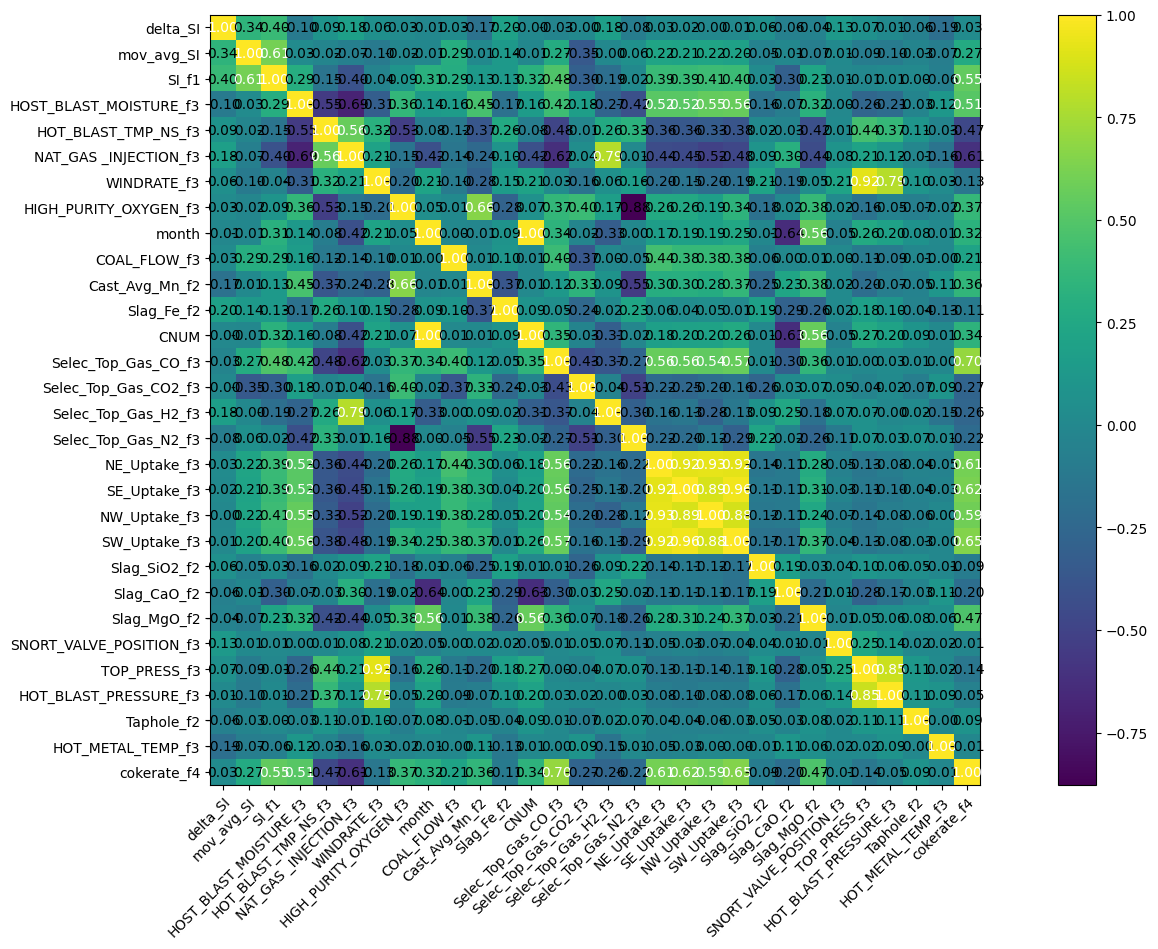

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


982



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.200712
Loss_SI: 1.3587696552276611 Loss_all: 1.1059798002243042
===
[200] Train Loss: 0.090967
Loss_SI: 0.4178447723388672 Loss_all: 0.5990432500839233
===
[400] Train Loss: 0.023641
Loss_SI: 0.36180466413497925 Loss_all: 0.4365311861038208
===
[600] Train Loss: 0.028050
Loss_SI: 0.3345105051994324 Loss_all: 0.22367557883262634
===
[800] Train Loss: 0.033336
Loss_SI: 0.40009257197380066 Loss_all: 0.29463768005371094
===


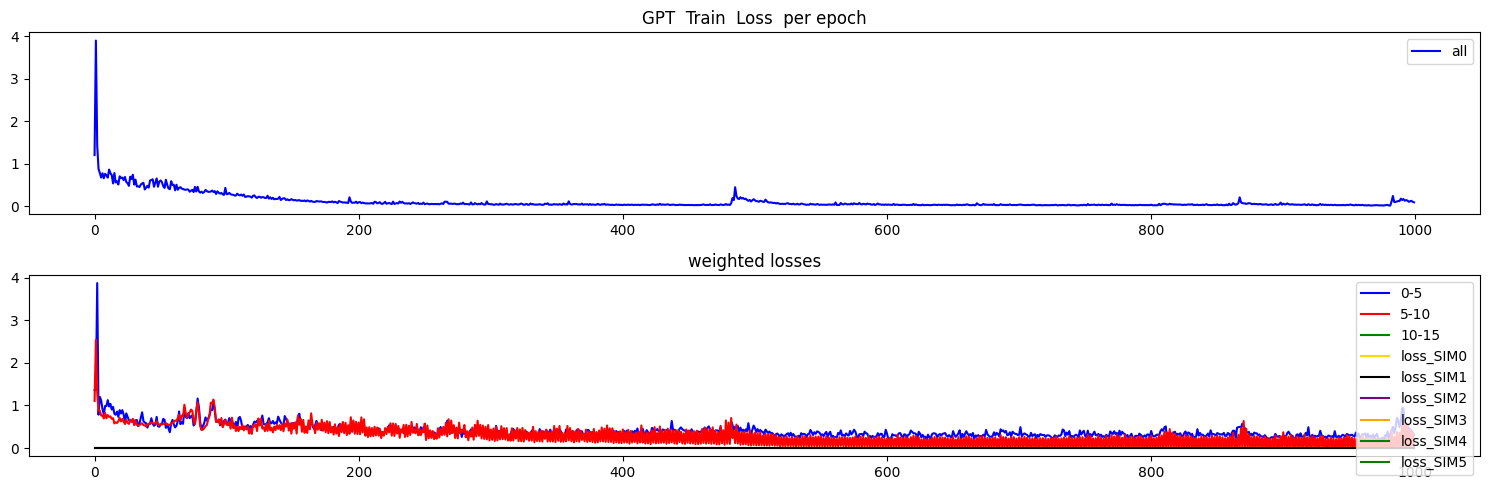

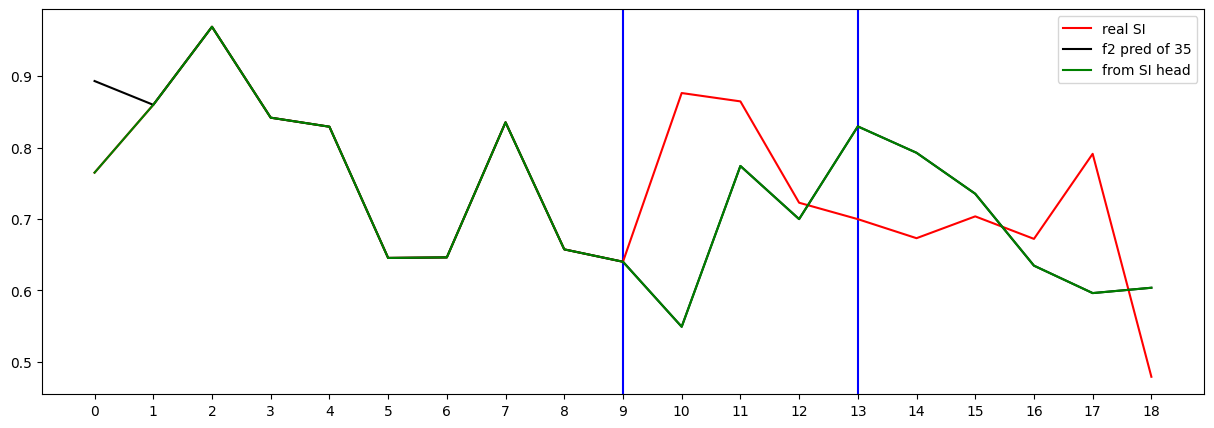

Testing R**2 - (all) - (no inputs):  0.9967521051893498
Testing R**2 - (f2) - SI full (no inputs):  -1.255742642244066
Testing R**2 - SI head only (no inputs):  -1.255742642244066
0 ...index R**2 (no inputs):  -0.8477722573179118
1 ...index R**2 (no inputs):  -1.118177461746813
2 ...index R**2 (no inputs):  -1.255742642244066
3 ...index R**2 (no inputs):  -9.970283127145144
4 ...index R**2 (no inputs):  -3.3277179693351666
5 ...index R**2 (no inputs):  -0.9111230242851263
6 ...index R**2 (no inputs):  -0.022552761707475666
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.723469670029833
10 ...index R**2 (no inputs):  -1.4263276454403555
11 ...index R**2 (no inputs):  -9.815133380711522
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.1380999701529095
16 ...index R**2 (no inputs):  -0.4681600975083333
17 ...index R**2 (no inputs):  -9.772738939826

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.149157
Loss_SI: 1.1890642642974854 Loss_all: 1.256476640701294
===
[200] Train Loss: 0.162371
Loss_SI: 0.4001958966255188 Loss_all: 0.2906002104282379
===
[400] Train Loss: 0.078963
Loss_SI: 0.31929418444633484 Loss_all: 0.2903497517108917
===
[600] Train Loss: 0.049322
Loss_SI: 0.21096324920654297 Loss_all: 0.23976017534732819
===
[800] Train Loss: 0.053891
Loss_SI: 0.275805801153183 Loss_all: 0.2477426826953888
===


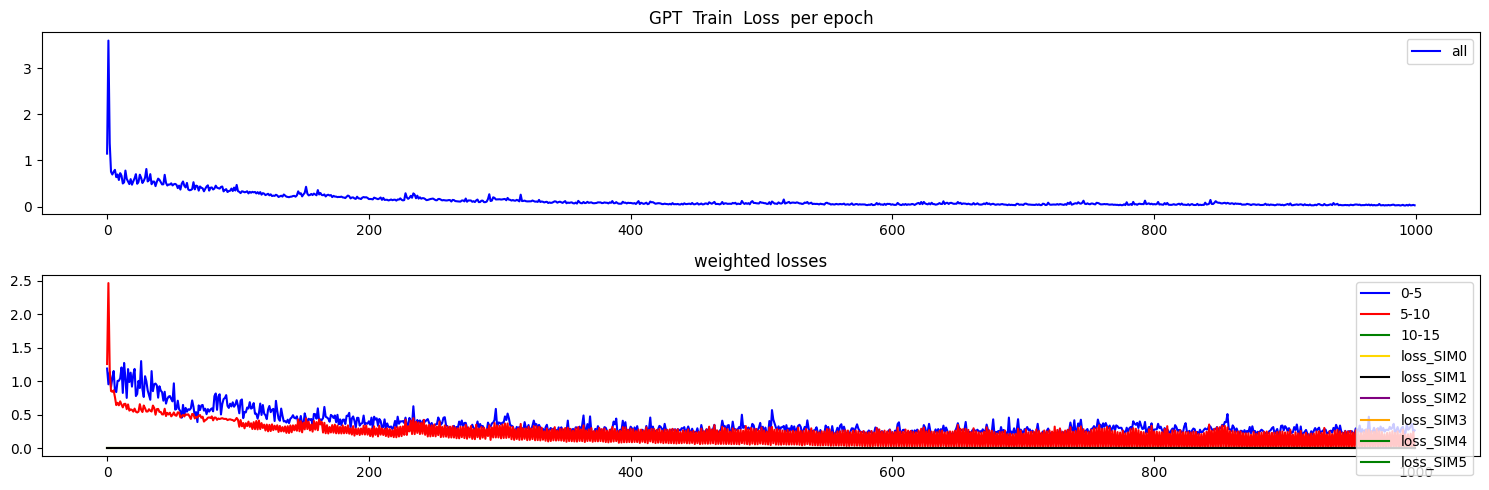

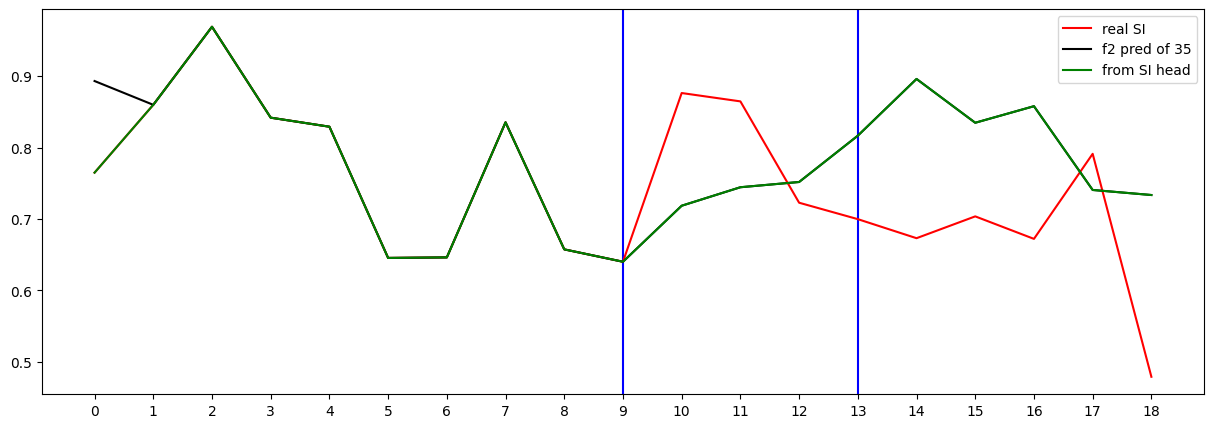

Testing R**2 - (all) - (no inputs):  0.9983888572030306
Testing R**2 - (f2) - SI full (no inputs):  -1.0286498651514506
Testing R**2 - SI head only (no inputs):  -1.0286498651514506
0 ...index R**2 (no inputs):  0.07117110052271958
1 ...index R**2 (no inputs):  -0.00509943341503627
2 ...index R**2 (no inputs):  -1.0286498651514506
3 ...index R**2 (no inputs):  -0.21551630075304495
4 ...index R**2 (no inputs):  -2.684916337593062
5 ...index R**2 (no inputs):  0.062218245590536236
6 ...index R**2 (no inputs):  -0.15914503682409986
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2443028321660368
10 ...index R**2 (no inputs):  -1.090769989174988
11 ...index R**2 (no inputs):  -16.80170728879841
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.508648495870136
16 ...index R**2 (no inputs):  0.014035833991305813
17 ...index R**2 (no inputs):  -39.50513

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.402417
Loss_SI: 1.4111026525497437 Loss_all: 1.271545648574829
===
[200] Train Loss: 0.188998
Loss_SI: 0.515408992767334 Loss_all: 0.35031819343566895
===
[400] Train Loss: 0.087527
Loss_SI: 0.4838399887084961 Loss_all: 0.320403516292572
===
[600] Train Loss: 0.056666
Loss_SI: 0.47261449694633484 Loss_all: 0.2822669446468353
===
[800] Train Loss: 0.031334
Loss_SI: 0.27046242356300354 Loss_all: 0.22527247667312622
===


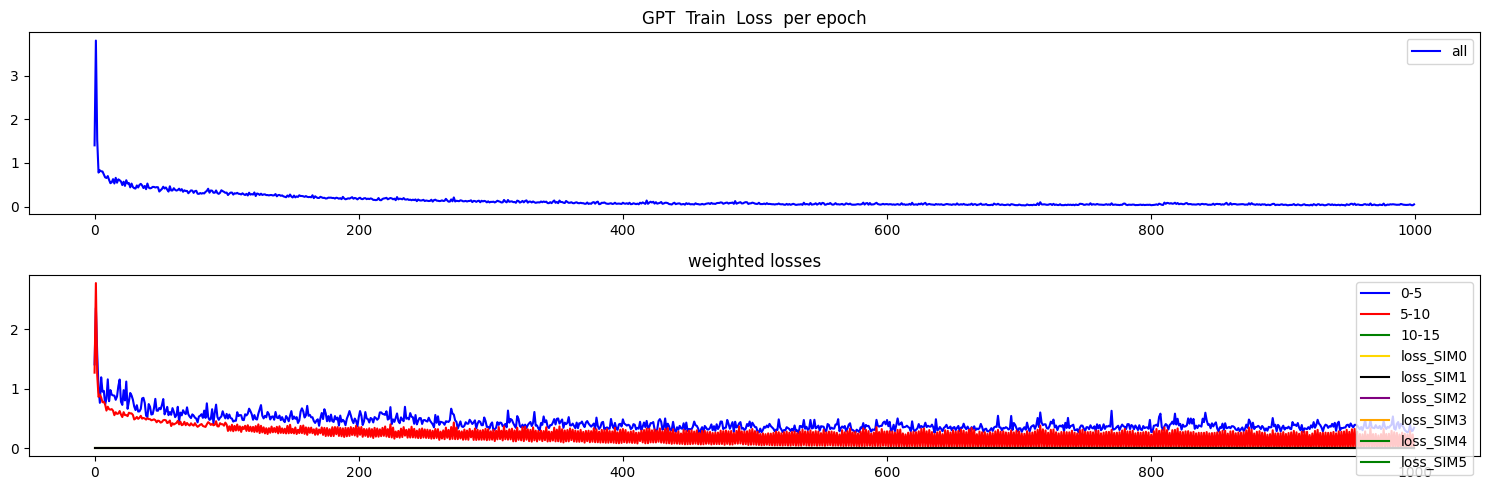

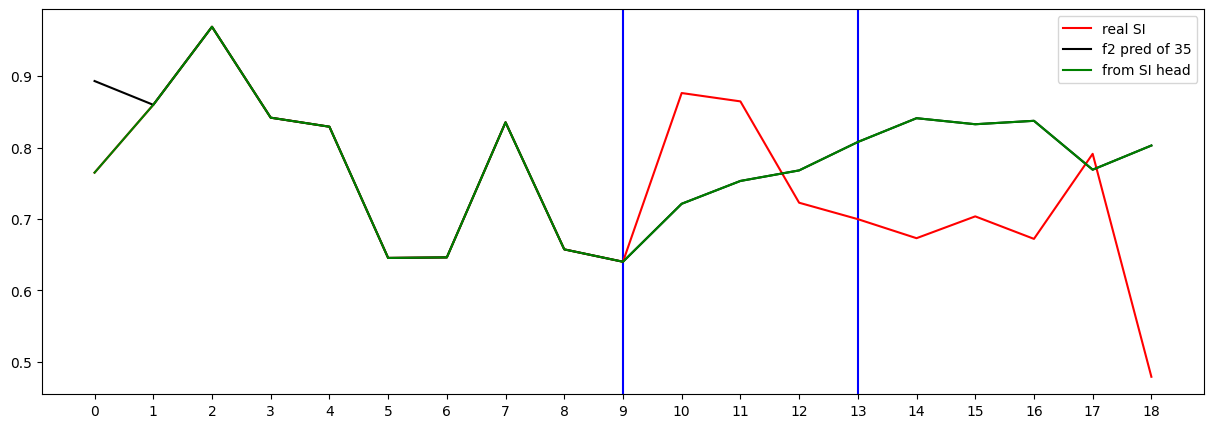

Testing R**2 - (all) - (no inputs):  0.9974736641408728
Testing R**2 - (f2) - SI full (no inputs):  -0.9637731342183793
Testing R**2 - SI head only (no inputs):  -0.9637731342183793
0 ...index R**2 (no inputs):  0.2192009221850325
1 ...index R**2 (no inputs):  0.11302874526541506
2 ...index R**2 (no inputs):  -0.9637731342183793
3 ...index R**2 (no inputs):  -11.217902250817165
4 ...index R**2 (no inputs):  -10.507146512778535
5 ...index R**2 (no inputs):  -0.4796152174621966
6 ...index R**2 (no inputs):  -0.19134991356446873
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.183257783282425
10 ...index R**2 (no inputs):  -0.9158842483522578
11 ...index R**2 (no inputs):  -28.687764376154902
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.065291138627078
16 ...index R**2 (no inputs):  -0.4920745399801383
17 ...index R**2 (no inputs):  -24.70193997

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.212691
Loss_SI: 1.5711736679077148 Loss_all: 1.237089991569519
===
[200] Train Loss: 0.228351
Loss_SI: 0.5093855261802673 Loss_all: 0.3771388530731201
===
[400] Train Loss: 0.089454
Loss_SI: 0.38859930634498596 Loss_all: 0.28884097933769226
===
[600] Train Loss: 0.052270
Loss_SI: 0.30245694518089294 Loss_all: 0.2945457696914673
===
[800] Train Loss: 0.040243
Loss_SI: 0.3127099275588989 Loss_all: 0.28985127806663513
===


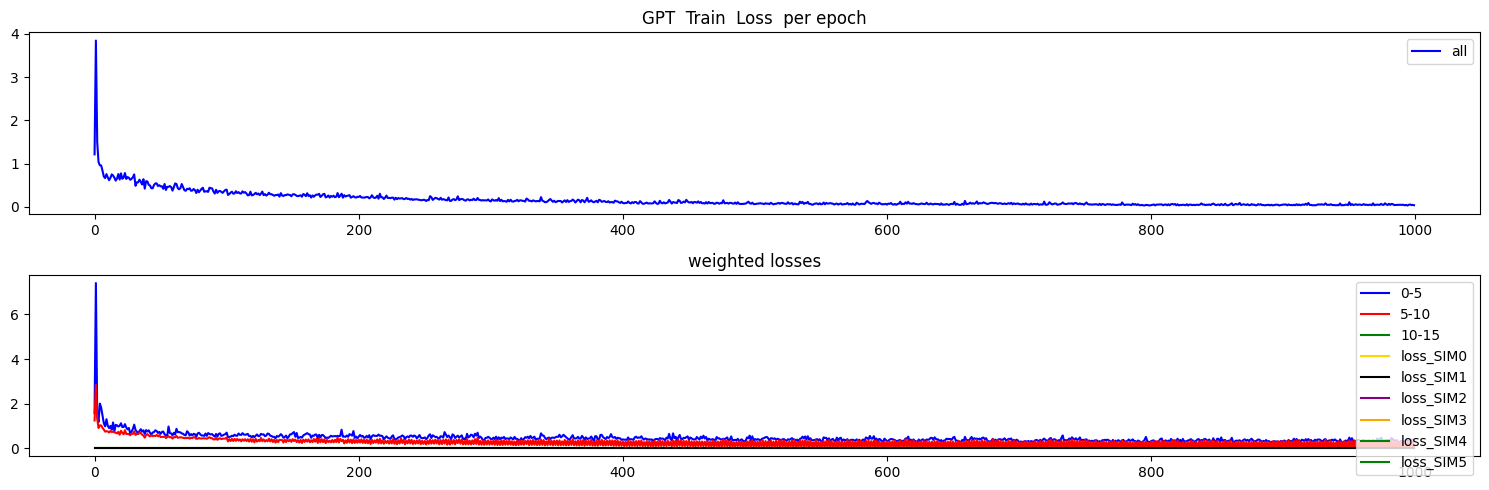

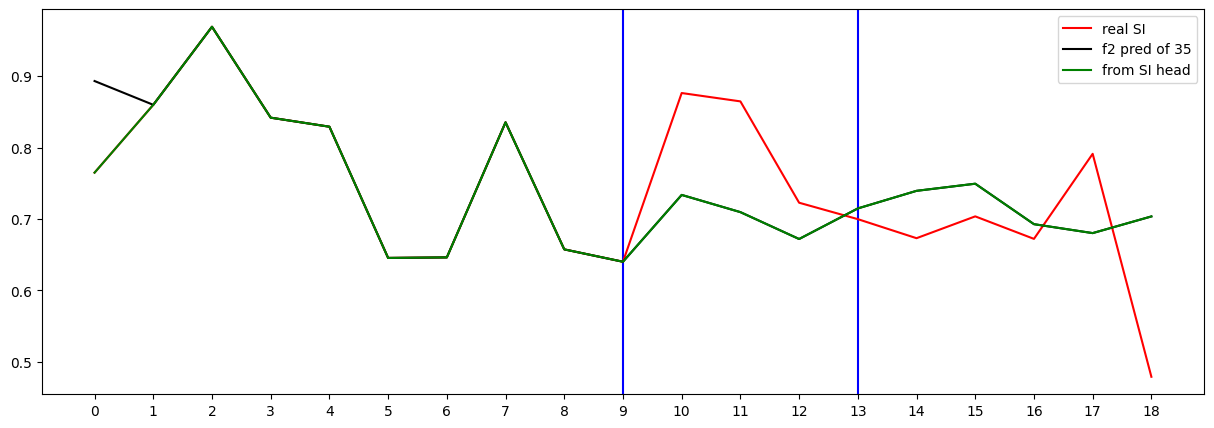

Testing R**2 - (all) - (no inputs):  0.9966070037076441
Testing R**2 - (f2) - SI full (no inputs):  0.09916907216470339
Testing R**2 - SI head only (no inputs):  0.09916907216470339
0 ...index R**2 (no inputs):  0.029173656571857443
1 ...index R**2 (no inputs):  -0.3308646449538404
2 ...index R**2 (no inputs):  0.09916907216470339
3 ...index R**2 (no inputs):  -55.515663704581506
4 ...index R**2 (no inputs):  -8.947669400560923
5 ...index R**2 (no inputs):  -0.9811160609775289
6 ...index R**2 (no inputs):  -0.4999444028485067
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14573577252578063
10 ...index R**2 (no inputs):  -1.3214163526402247
11 ...index R**2 (no inputs):  -9.411612809876898
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8812994917584662
16 ...index R**2 (no inputs):  -0.2935701392329033
17 ...index R**2 (no inputs):  -184.06738

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.151053
Loss_SI: 1.1346914768218994 Loss_all: 1.2315561771392822
===
[200] Train Loss: 0.070737
Loss_SI: 0.39793309569358826 Loss_all: 0.2700332701206207
===
[400] Train Loss: 0.027543
Loss_SI: 0.3851601779460907 Loss_all: 0.25739923119544983
===
[600] Train Loss: 0.026770
Loss_SI: 0.47285768389701843 Loss_all: 0.27722495794296265
===
[800] Train Loss: 0.019122
Loss_SI: 0.4269021153450012 Loss_all: 0.27506643533706665
===


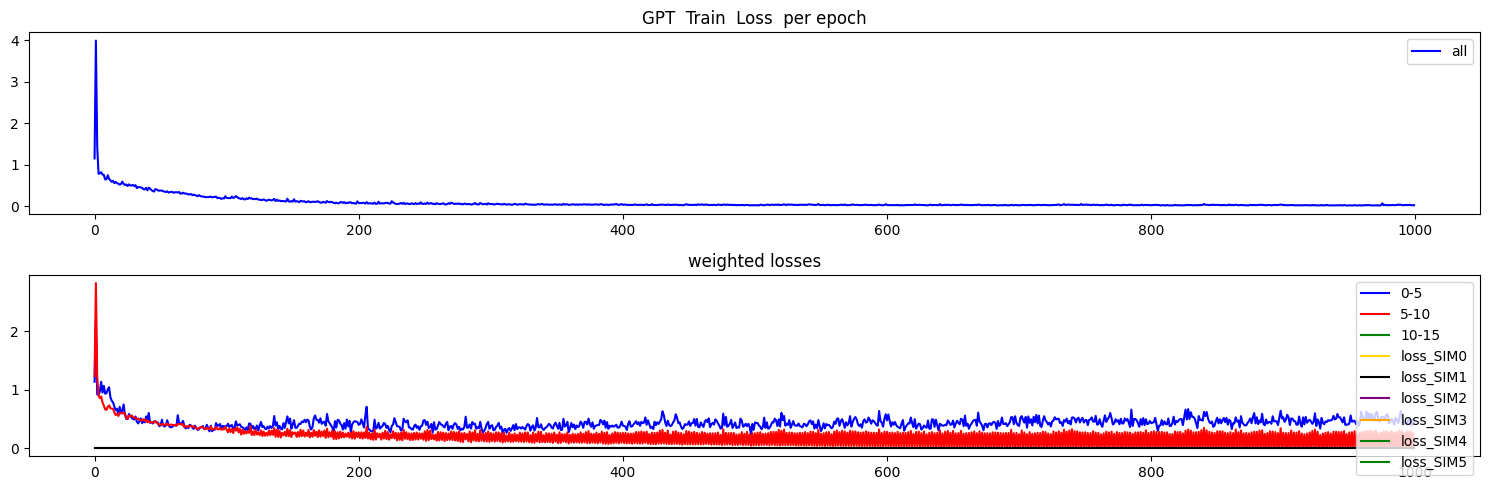

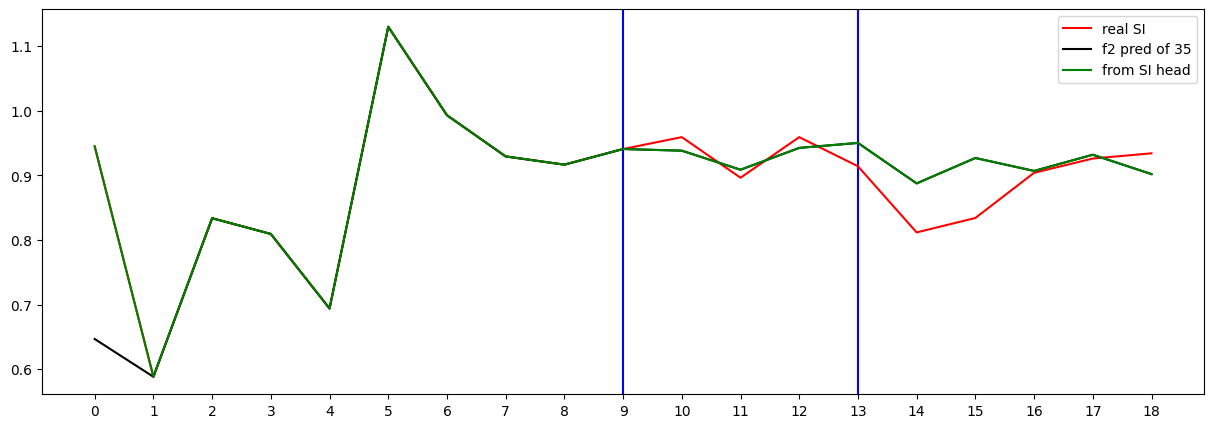

Testing R**2 - (all) - (no inputs):  0.8686354260978212
Testing R**2 - (f2) - SI full (no inputs):  -0.5203113763611764
Testing R**2 - SI head only (no inputs):  -0.5203113763611764
0 ...index R**2 (no inputs):  -0.15739059386007836
1 ...index R**2 (no inputs):  -0.2784451866438655
2 ...index R**2 (no inputs):  -0.5203113763611764
3 ...index R**2 (no inputs):  -7825.5520540694915
4 ...index R**2 (no inputs):  -8.807821410052428
5 ...index R**2 (no inputs):  -1418.5880948863562
6 ...index R**2 (no inputs):  -19.46159314174256
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.196135224344259
10 ...index R**2 (no inputs):  -0.942439738170121
11 ...index R**2 (no inputs):  -376.9685677583302
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -19.903635807736105
16 ...index R**2 (no inputs):  -1.8744084672310355
17 ...index R**2 (no inputs):  -772.575934821

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.217848
Loss_SI: 1.2085872888565063 Loss_all: 1.2779330015182495
===
[200] Train Loss: 0.109643
Loss_SI: 0.46695566177368164 Loss_all: 0.34671616554260254
===
[400] Train Loss: 0.054485
Loss_SI: 0.4240327775478363 Loss_all: 0.30999755859375
===
[600] Train Loss: 0.032801
Loss_SI: 0.4030821919441223 Loss_all: 0.27712032198905945
===
[800] Train Loss: 0.034625
Loss_SI: 0.46442100405693054 Loss_all: 0.3295643925666809
===


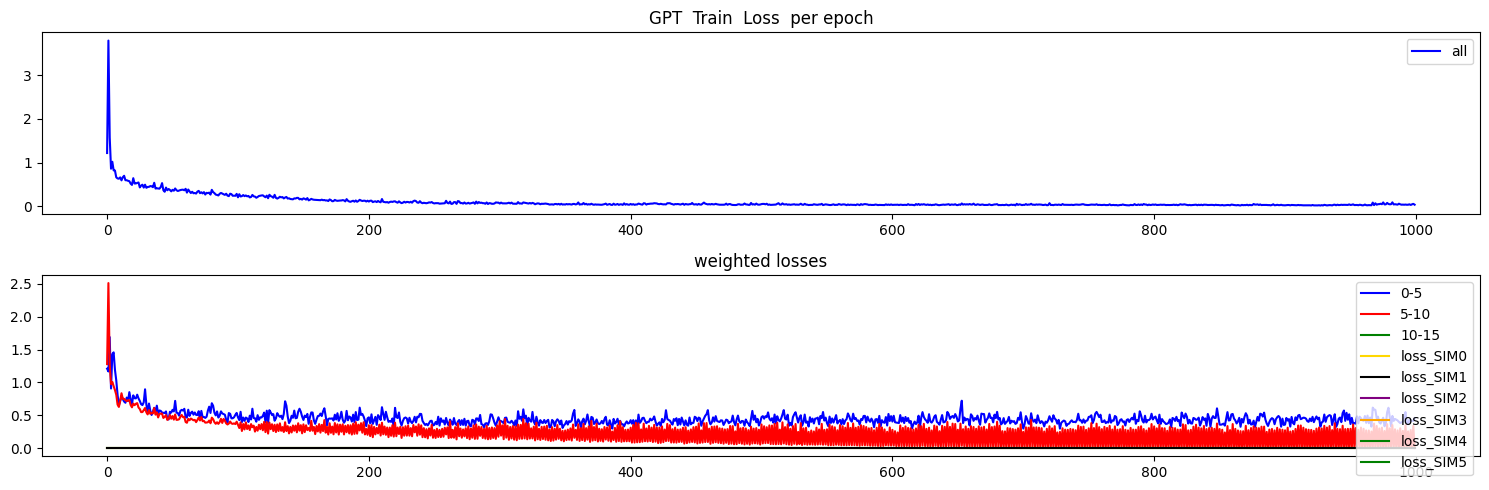

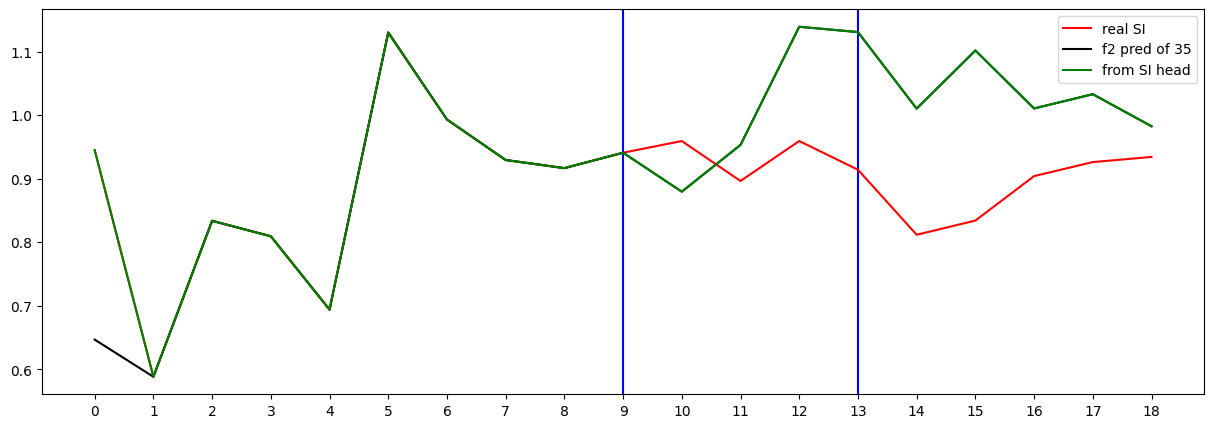

Testing R**2 - (all) - (no inputs):  0.9347109829487619
Testing R**2 - (f2) - SI full (no inputs):  -11.253915835975405
Testing R**2 - SI head only (no inputs):  -11.253915835975405
0 ...index R**2 (no inputs):  -3.4617932581928974
1 ...index R**2 (no inputs):  -0.8135732024097948
2 ...index R**2 (no inputs):  -11.253915835975405
3 ...index R**2 (no inputs):  -9578.656835311407
4 ...index R**2 (no inputs):  -9.865559318240107
5 ...index R**2 (no inputs):  -702.317364556186
6 ...index R**2 (no inputs):  -34.255716161337965
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5462960194535973
10 ...index R**2 (no inputs):  0.2556023504512832
11 ...index R**2 (no inputs):  -669.3120331182366
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.555899456722265
16 ...index R**2 (no inputs):  -1.6711073708636857
17 ...index R**2 (no inputs):  -1335.90169936056

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.113136
Loss_SI: 1.7000782489776611 Loss_all: 1.1704561710357666
===
[200] Train Loss: 0.151427
Loss_SI: 0.42591387033462524 Loss_all: 0.3149089217185974
===
[400] Train Loss: 0.053723
Loss_SI: 0.3913825750350952 Loss_all: 0.2640021741390228
===
[600] Train Loss: 0.045390
Loss_SI: 0.3783545196056366 Loss_all: 0.25148841738700867
===
[800] Train Loss: 0.069543
Loss_SI: 0.4295375347137451 Loss_all: 0.31223779916763306
===


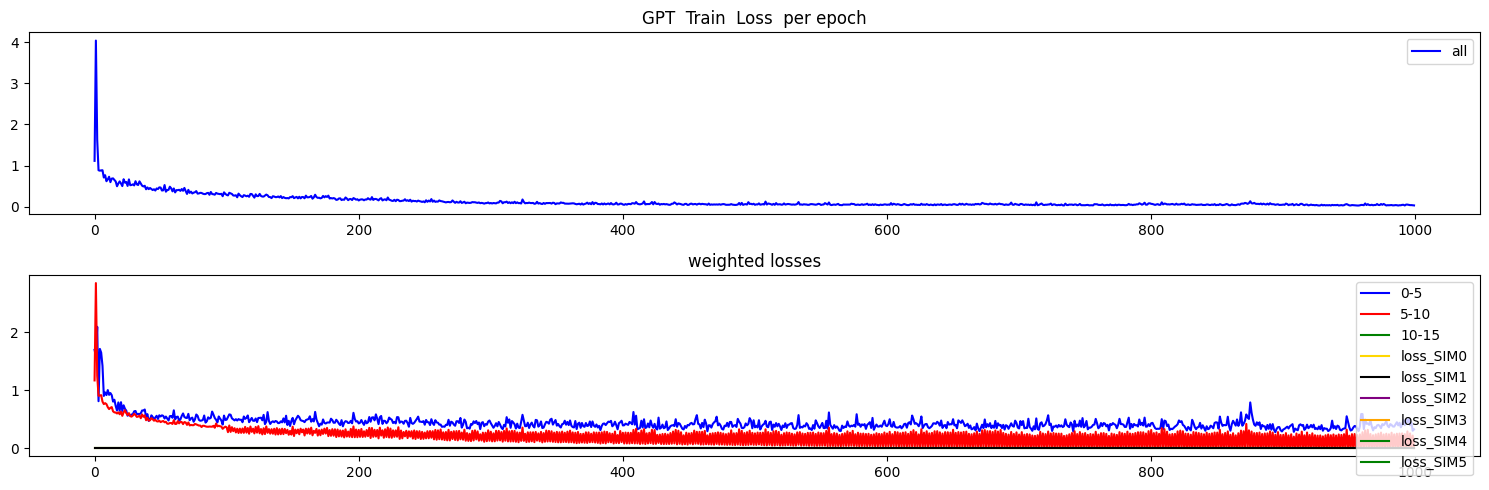

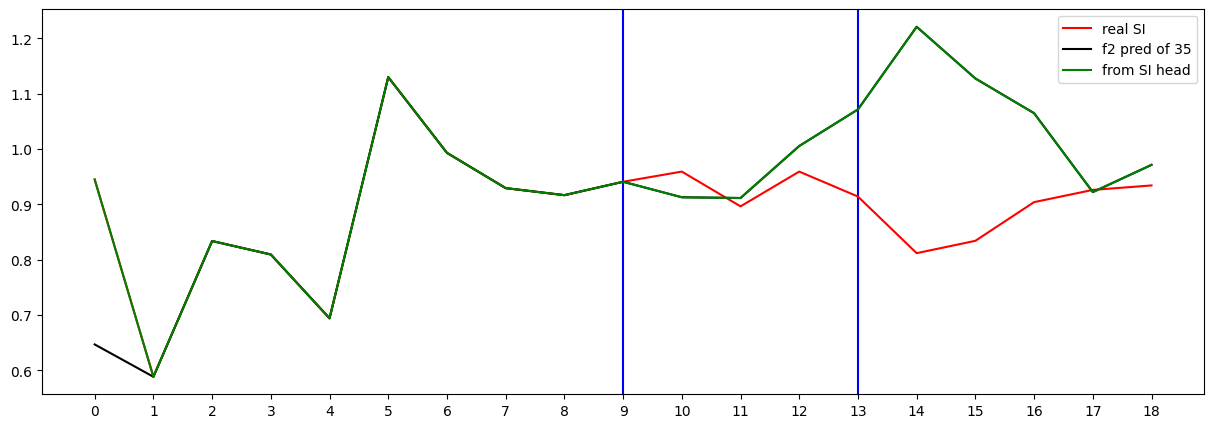

Testing R**2 - (all) - (no inputs):  0.9385024284925207
Testing R**2 - (f2) - SI full (no inputs):  -14.162573492386274
Testing R**2 - SI head only (no inputs):  -14.162573492386274
0 ...index R**2 (no inputs):  -5.047540995194743
1 ...index R**2 (no inputs):  -1.025422884650677
2 ...index R**2 (no inputs):  -14.162573492386274
3 ...index R**2 (no inputs):  -6121.643542340688
4 ...index R**2 (no inputs):  -9.482466570253093
5 ...index R**2 (no inputs):  -661.5247391031874
6 ...index R**2 (no inputs):  -34.51560479230377
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5801018511767055
10 ...index R**2 (no inputs):  0.06964098205862124
11 ...index R**2 (no inputs):  -620.4818644148389
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.9418770235645617
16 ...index R**2 (no inputs):  -3.3455356742677758
17 ...index R**2 (no inputs):  -953.772440840913

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.155408
Loss_SI: 1.2808412313461304 Loss_all: 1.3090184926986694
===
[200] Train Loss: 0.204363
Loss_SI: 0.40597110986709595 Loss_all: 0.32900696992874146
===
[400] Train Loss: 0.073529
Loss_SI: 0.2656695246696472 Loss_all: 0.25793007016181946
===
[600] Train Loss: 0.044318
Loss_SI: 0.25040993094444275 Loss_all: 0.22979676723480225
===
[800] Train Loss: 0.044117
Loss_SI: 0.2587663233280182 Loss_all: 0.23889164626598358
===


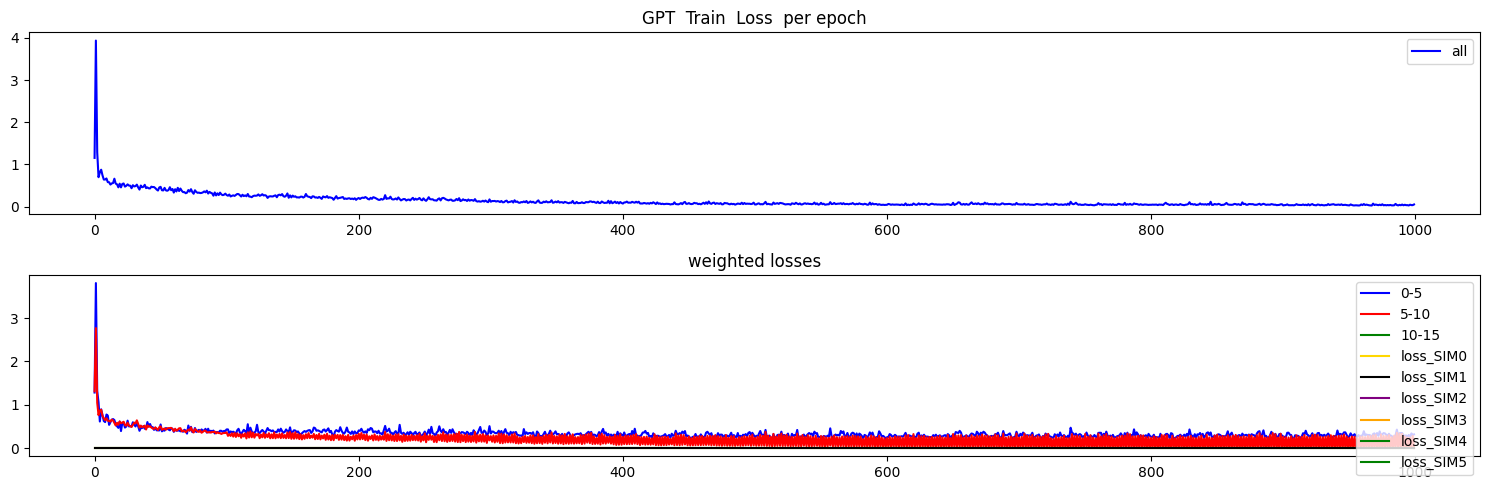

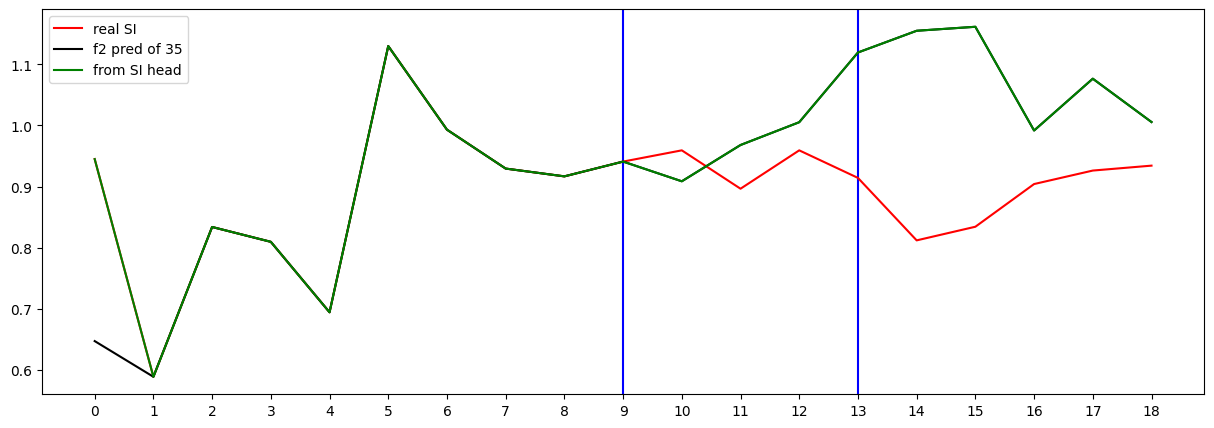

Testing R**2 - (all) - (no inputs):  0.902934256983059
Testing R**2 - (f2) - SI full (no inputs):  -14.304514653019742
Testing R**2 - SI head only (no inputs):  -14.304514653019742
0 ...index R**2 (no inputs):  -3.2835944155620806
1 ...index R**2 (no inputs):  -0.5988876458654866
2 ...index R**2 (no inputs):  -14.304514653019742
3 ...index R**2 (no inputs):  -9776.225371529177
4 ...index R**2 (no inputs):  -12.70616636913336
5 ...index R**2 (no inputs):  -1045.622571759135
6 ...index R**2 (no inputs):  -39.39409390006984
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2115702644124493
10 ...index R**2 (no inputs):  0.08546645511952478
11 ...index R**2 (no inputs):  -707.9561463140867
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.0086905342817385
16 ...index R**2 (no inputs):  -4.199777013021028
17 ...index R**2 (no inputs):  -1475.17307359738

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.237873
Loss_SI: 1.2757234573364258 Loss_all: 1.1887377500534058
===
[200] Train Loss: 0.082876
Loss_SI: 0.39596232771873474 Loss_all: 0.37901967763900757
===
[400] Train Loss: 0.043513
Loss_SI: 0.3631415069103241 Loss_all: 0.262203186750412
===
[600] Train Loss: 0.022628
Loss_SI: 0.32538917660713196 Loss_all: 0.26812320947647095
===
[800] Train Loss: 0.019777
Loss_SI: 0.32225513458251953 Loss_all: 0.29811546206474304
===


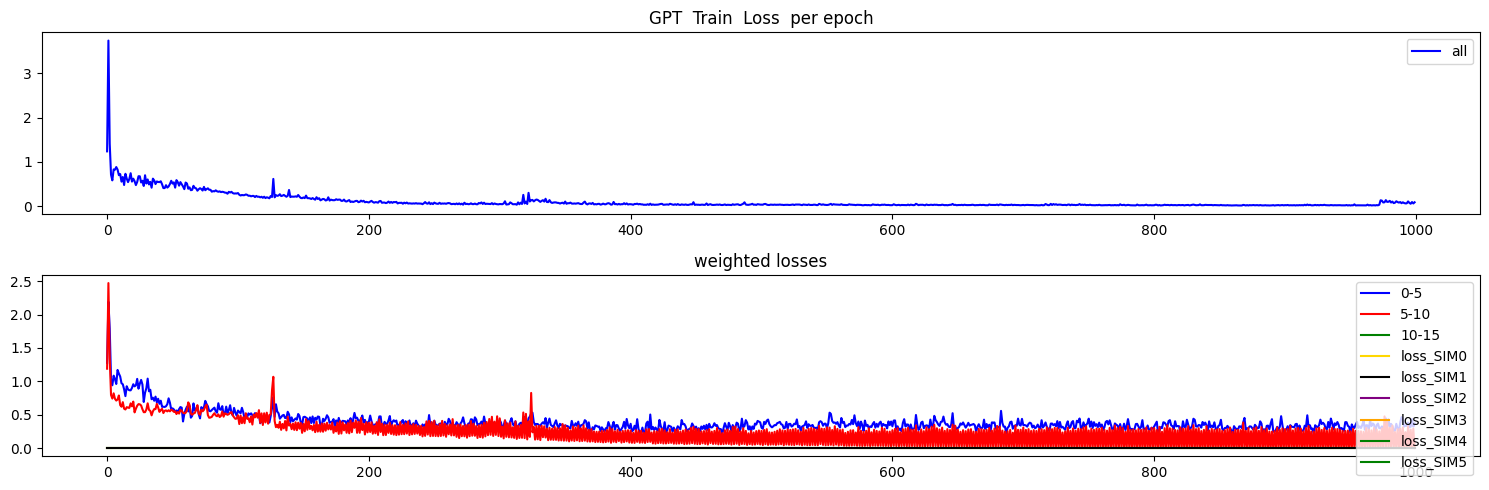

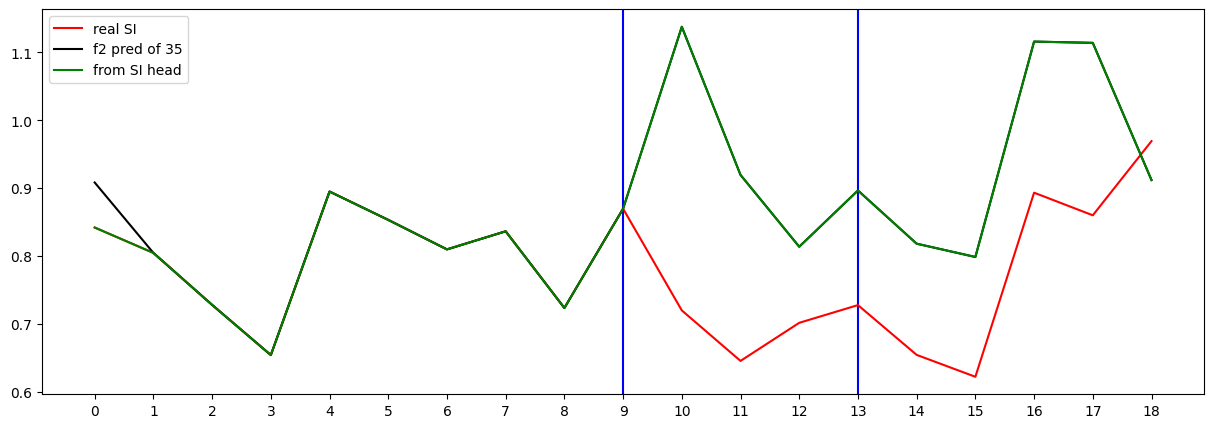

Testing R**2 - (all) - (no inputs):  0.9995268721747648
Testing R**2 - (f2) - SI full (no inputs):  -2.9440083556929704
Testing R**2 - SI head only (no inputs):  -2.9440083556929704
0 ...index R**2 (no inputs):  -2.107273299809311
1 ...index R**2 (no inputs):  -1.3582270928693867
2 ...index R**2 (no inputs):  -2.9440083556929704
3 ...index R**2 (no inputs):  -5.932001145761326
4 ...index R**2 (no inputs):  -44.106720363867844
5 ...index R**2 (no inputs):  -7.397454260597403
6 ...index R**2 (no inputs):  -1.2888905107429443
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.00546280454856
10 ...index R**2 (no inputs):  0.06066899887454413
11 ...index R**2 (no inputs):  -36.20754013344084
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.71382182766252
16 ...index R**2 (no inputs):  -1.3862358852830416
17 ...index R**2 (no inputs):  -281.3890651925052

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.949103
Loss_SI: 2.197039842605591 Loss_all: 1.1026966571807861
===
[200] Train Loss: 0.111141
Loss_SI: 0.3211497962474823 Loss_all: 0.26656368374824524
===
[400] Train Loss: 0.040913
Loss_SI: 0.2672704756259918 Loss_all: 0.21126212179660797
===
[600] Train Loss: 0.035478
Loss_SI: 0.3221536874771118 Loss_all: 0.2229132503271103
===
[800] Train Loss: 0.028811
Loss_SI: 0.26932308077812195 Loss_all: 0.2345113307237625
===


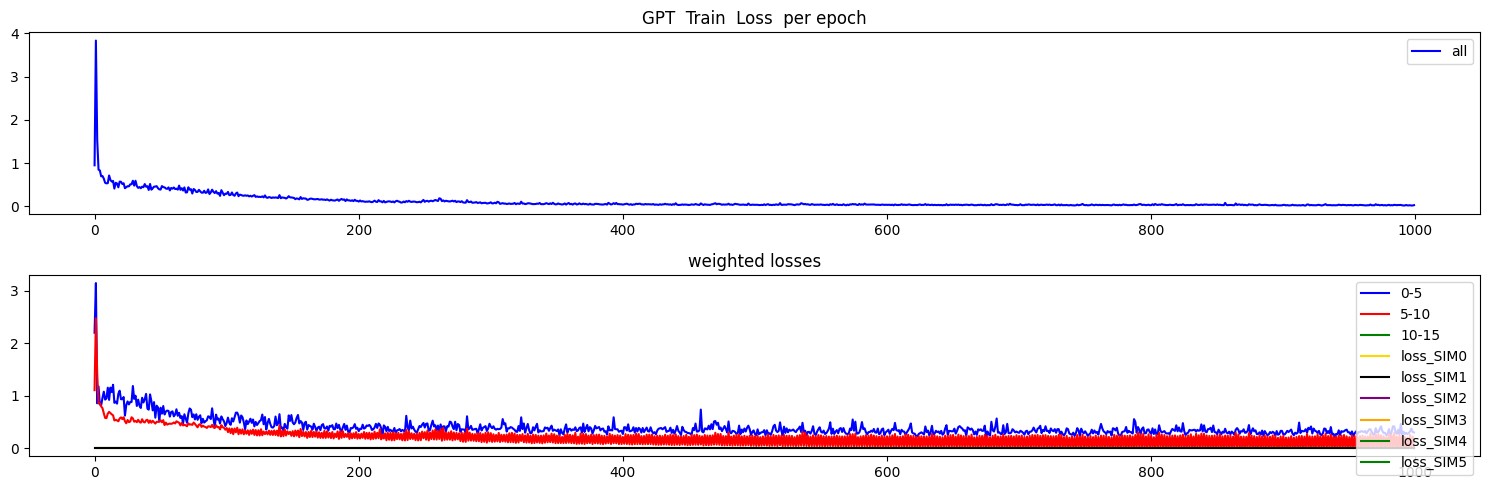

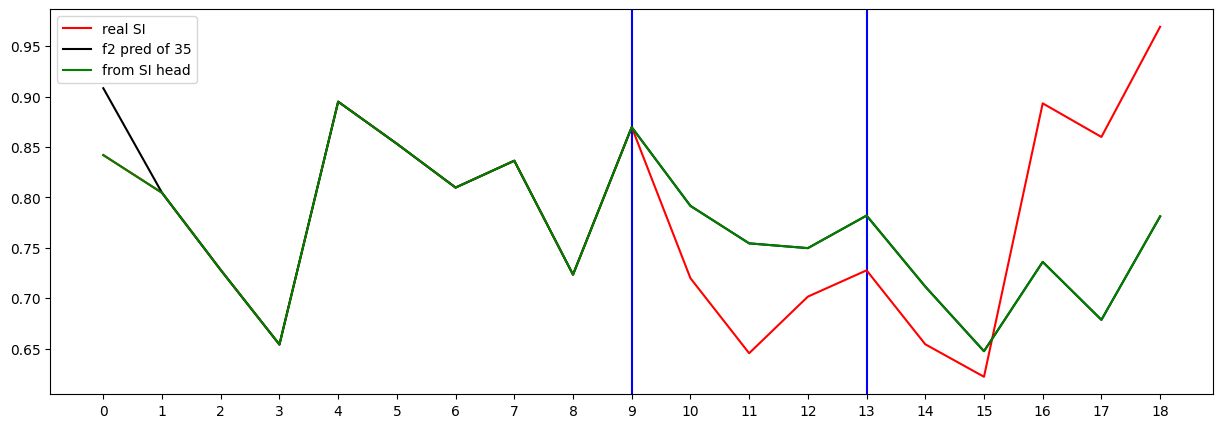

Testing R**2 - (all) - (no inputs):  0.9991101288119223
Testing R**2 - (f2) - SI full (no inputs):  -0.6980585644458519
Testing R**2 - SI head only (no inputs):  -0.6980585644458519
0 ...index R**2 (no inputs):  -0.660609942448436
1 ...index R**2 (no inputs):  -1.2666840014680263
2 ...index R**2 (no inputs):  -0.6980585644458519
3 ...index R**2 (no inputs):  -4.17412941130639
4 ...index R**2 (no inputs):  -4.039484418852742
5 ...index R**2 (no inputs):  -16.895012884213646
6 ...index R**2 (no inputs):  -0.4639261237946104
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.129874192029018
10 ...index R**2 (no inputs):  0.27824953687829346
11 ...index R**2 (no inputs):  -69.38212741137883
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.77395410849812
16 ...index R**2 (no inputs):  -0.970265546587566
17 ...index R**2 (no inputs):  -105.47671117181648

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.357230
Loss_SI: 1.0499032735824585 Loss_all: 1.2850167751312256
===
[200] Train Loss: 0.193493
Loss_SI: 0.5517082214355469 Loss_all: 0.37446942925453186
===
[400] Train Loss: 0.088756
Loss_SI: 0.3982778787612915 Loss_all: 0.2725813090801239
===
[600] Train Loss: 0.033732
Loss_SI: 0.2497478574514389 Loss_all: 0.22047439217567444
===
[800] Train Loss: 0.035930
Loss_SI: 0.3287210166454315 Loss_all: 0.2625766098499298
===


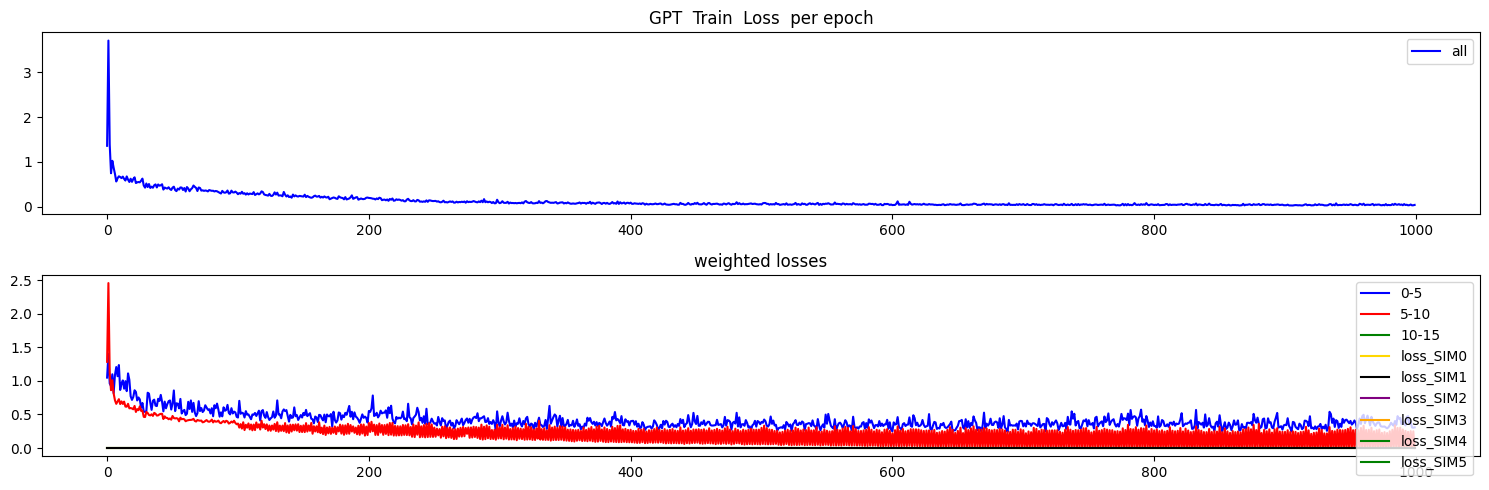

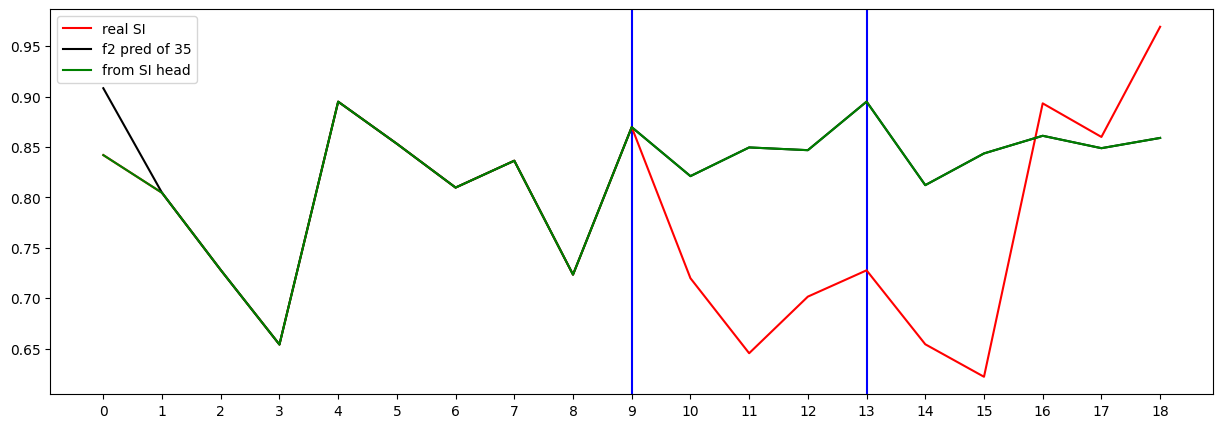

Testing R**2 - (all) - (no inputs):  0.9994812201574065
Testing R**2 - (f2) - SI full (no inputs):  -0.4216518914256808
Testing R**2 - SI head only (no inputs):  -0.4216518914256808
0 ...index R**2 (no inputs):  -0.1466441740997706
1 ...index R**2 (no inputs):  -3.203864933180208
2 ...index R**2 (no inputs):  -0.4216518914256808
3 ...index R**2 (no inputs):  0.5295277874815023
4 ...index R**2 (no inputs):  -1.085730646916642
5 ...index R**2 (no inputs):  -9.365323742834242
6 ...index R**2 (no inputs):  -0.4852802042351132
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8365502870585051
10 ...index R**2 (no inputs):  0.2860404713194933
11 ...index R**2 (no inputs):  -19.97359490620077
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8963840467732263
16 ...index R**2 (no inputs):  -0.4052591225050828
17 ...index R**2 (no inputs):  -15.827751652946

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.189999
Loss_SI: 1.4965615272521973 Loss_all: 1.2613000869750977
===
[200] Train Loss: 0.197835
Loss_SI: 0.5320913195610046 Loss_all: 0.3292231857776642
===
[400] Train Loss: 0.090425
Loss_SI: 0.37171807885169983 Loss_all: 0.30060961842536926
===
[600] Train Loss: 0.052735
Loss_SI: 0.3856869637966156 Loss_all: 0.2758037745952606
===
[800] Train Loss: 0.049898
Loss_SI: 0.36198145151138306 Loss_all: 0.29982221126556396
===


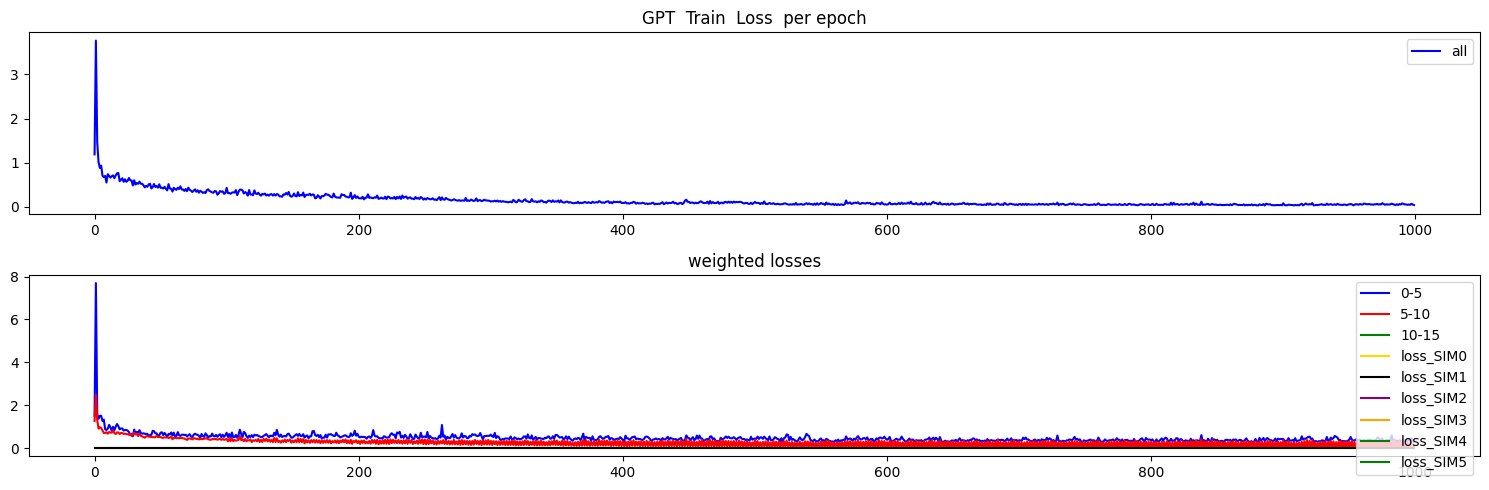

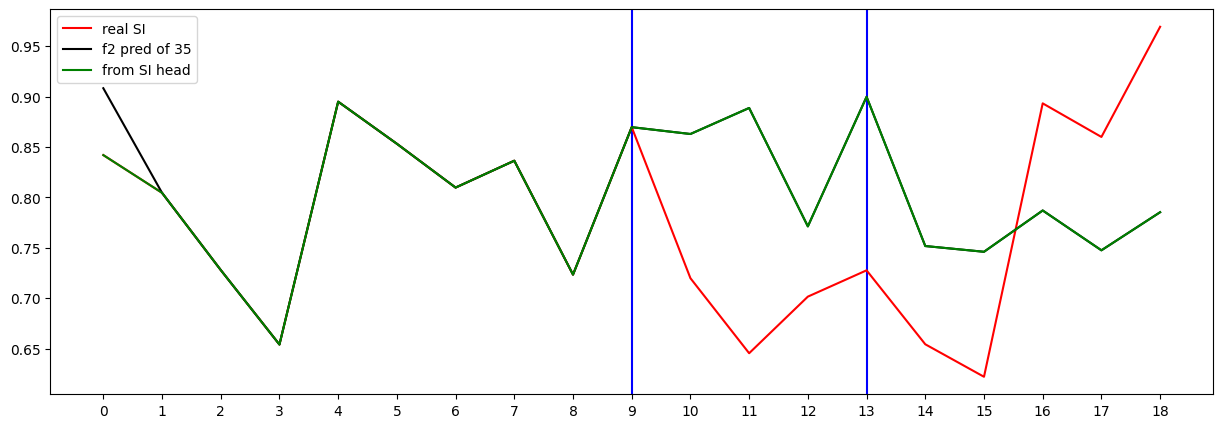

Testing R**2 - (all) - (no inputs):  0.9967976485993437
Testing R**2 - (f2) - SI full (no inputs):  -0.9190643229257816
Testing R**2 - SI head only (no inputs):  -0.9190643229257816
0 ...index R**2 (no inputs):  -0.7057702789793969
1 ...index R**2 (no inputs):  -1.277919215955785
2 ...index R**2 (no inputs):  -0.9190643229257816
3 ...index R**2 (no inputs):  -12.822848112577157
4 ...index R**2 (no inputs):  -0.49576172202317204
5 ...index R**2 (no inputs):  -64.73484026899872
6 ...index R**2 (no inputs):  -0.6361438733898022
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6160985209168597
10 ...index R**2 (no inputs):  0.15613835402014875
11 ...index R**2 (no inputs):  -49.285113011088136
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.9799554138577444
16 ...index R**2 (no inputs):  -2.1901296323279196
17 ...index R**2 (no inputs):  -626.447035

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.988123
Loss_SI: 1.2215790748596191 Loss_all: 1.0516654253005981
===
[200] Train Loss: 0.091864
Loss_SI: 0.49530377984046936 Loss_all: 0.34913548827171326
===
[400] Train Loss: 0.033139
Loss_SI: 0.46975788474082947 Loss_all: 0.31789833307266235
===
[600] Train Loss: 0.031426
Loss_SI: 0.3603147566318512 Loss_all: 0.2851499617099762
===
[800] Train Loss: 0.028400
Loss_SI: 0.3993217349052429 Loss_all: 0.3051607310771942
===


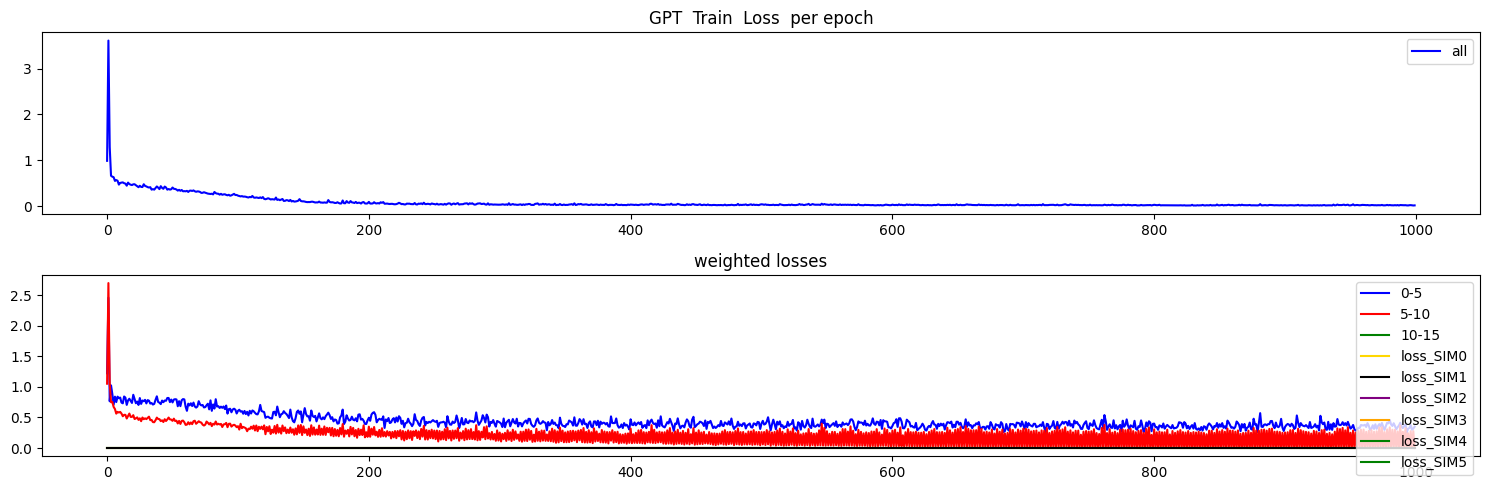

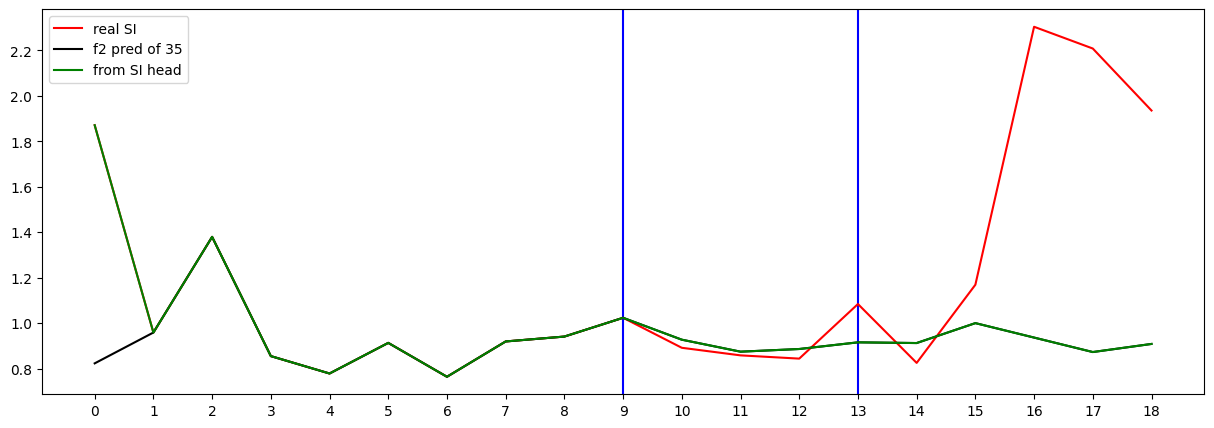

Testing R**2 - (all) - (no inputs):  0.9070288319362279
Testing R**2 - (f2) - SI full (no inputs):  -0.8078293155711229
Testing R**2 - SI head only (no inputs):  -0.8078293155711229
0 ...index R**2 (no inputs):  -0.039988817367926366
1 ...index R**2 (no inputs):  -0.5446402664746797
2 ...index R**2 (no inputs):  -0.8078293155711229
3 ...index R**2 (no inputs):  -0.5583219864370694
4 ...index R**2 (no inputs):  -0.48151907945307815
5 ...index R**2 (no inputs):  0.24647432230543442
6 ...index R**2 (no inputs):  -0.4212629065563529
7 ...index R**2 (no inputs):  -0.558042867602714
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7611478972760914
10 ...index R**2 (no inputs):  -0.3940608528178309
11 ...index R**2 (no inputs):  -8.429039131312647
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.582831556158391
16 ...index R**2 (no inputs):  -0.1864644999084848
17 ...index R**2 (no inpu

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.482748
Loss_SI: 1.9684364795684814 Loss_all: 1.4372572898864746
===
[200] Train Loss: 0.164115
Loss_SI: 1.315198302268982 Loss_all: 0.4789479374885559
===
[400] Train Loss: 0.059347
Loss_SI: 0.42181190848350525 Loss_all: 0.28456708788871765
===
[600] Train Loss: 0.067438
Loss_SI: 0.45773497223854065 Loss_all: 0.3607438802719116
===
[800] Train Loss: 0.069326
Loss_SI: 0.6275132894515991 Loss_all: 0.39698612689971924
===


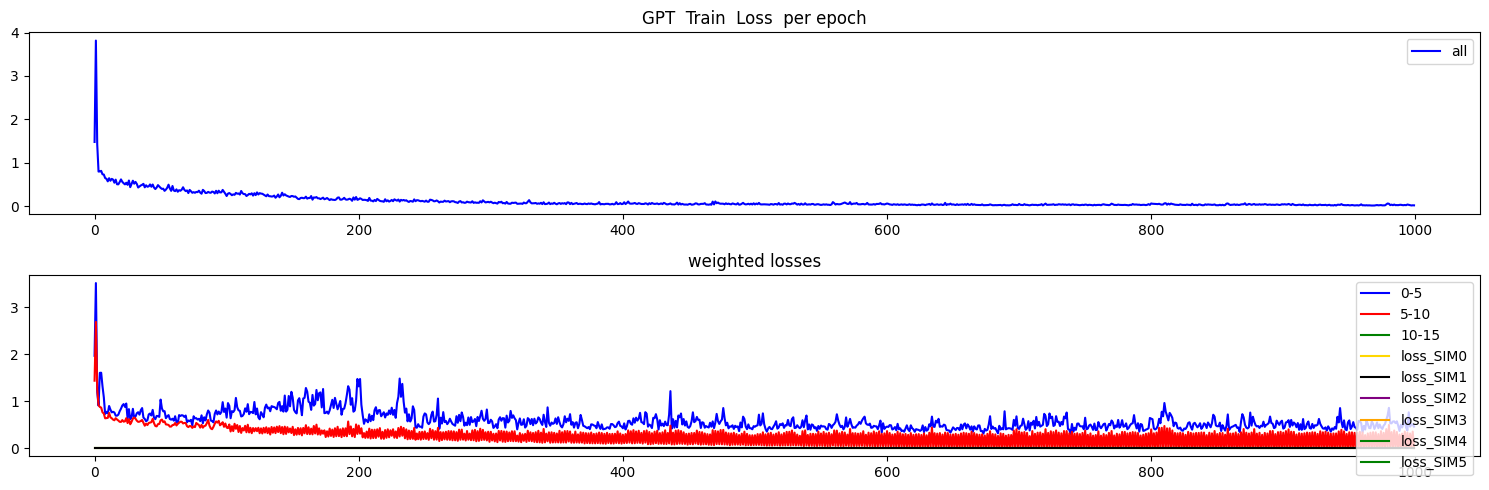

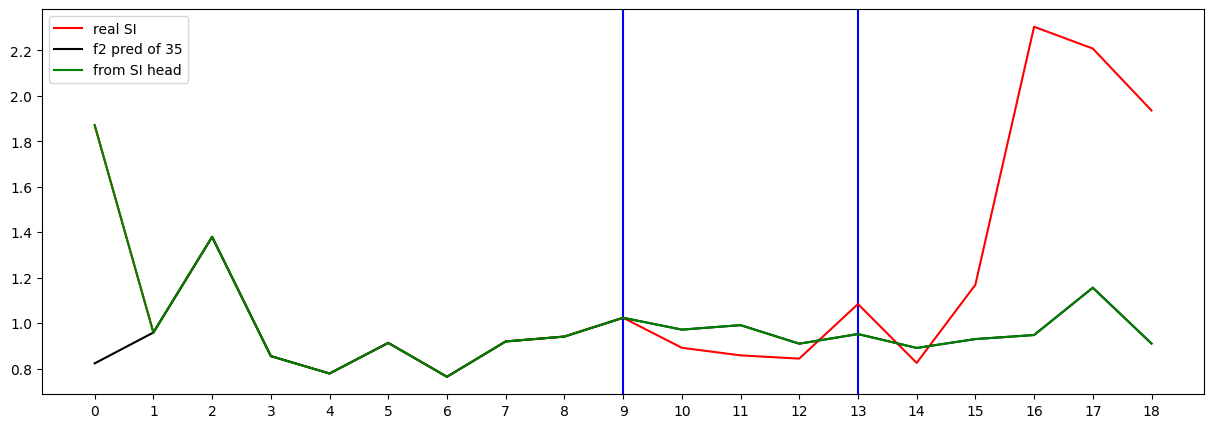

Testing R**2 - (all) - (no inputs):  0.9020364631058724
Testing R**2 - (f2) - SI full (no inputs):  -0.7005096774263204
Testing R**2 - SI head only (no inputs):  -0.7005096774263204
0 ...index R**2 (no inputs):  -0.21312454069451636
1 ...index R**2 (no inputs):  -0.3685750841918629
2 ...index R**2 (no inputs):  -0.7005096774263204
3 ...index R**2 (no inputs):  -0.6174765638189994
4 ...index R**2 (no inputs):  -0.5108030952110179
5 ...index R**2 (no inputs):  0.20616150529396382
6 ...index R**2 (no inputs):  -0.5997073559344333
7 ...index R**2 (no inputs):  -0.18993778918235438
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9509381266892278
10 ...index R**2 (no inputs):  -0.18331021159697425
11 ...index R**2 (no inputs):  -49.75053524695008
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.4915271140331394
16 ...index R**2 (no inputs):  -0.1053452715692893
17 ...index R**2 (no in

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.379634
Loss_SI: 1.5380710363388062 Loss_all: 1.2168625593185425
===
[200] Train Loss: 0.196387
Loss_SI: 0.5259524583816528 Loss_all: 0.34653598070144653
===
[400] Train Loss: 0.090549
Loss_SI: 0.5711771845817566 Loss_all: 0.3312222957611084
===
[600] Train Loss: 0.063619
Loss_SI: 0.3562576472759247 Loss_all: 0.27311044931411743
===
[800] Train Loss: 0.034163
Loss_SI: 0.3485318720340729 Loss_all: 0.2771826684474945
===


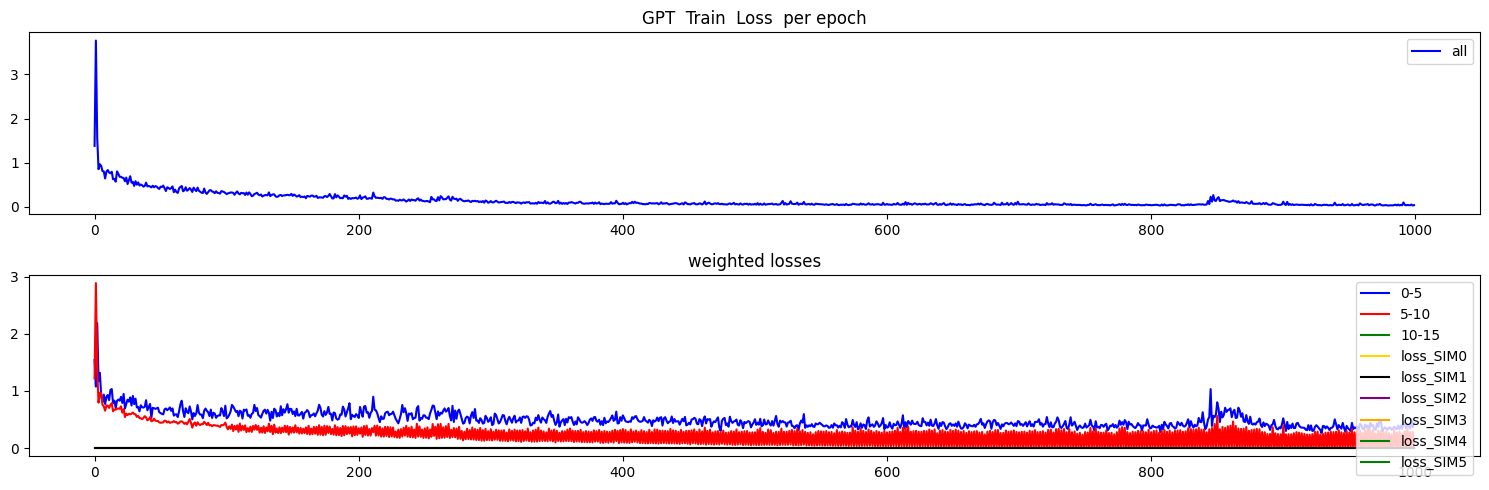

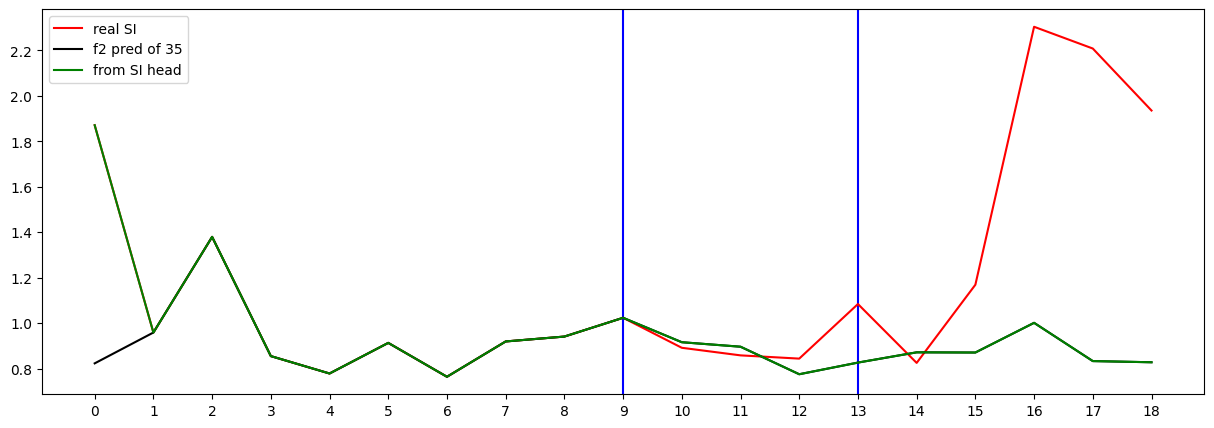

Testing R**2 - (all) - (no inputs):  0.9079402198301195
Testing R**2 - (f2) - SI full (no inputs):  -0.9764108581168673
Testing R**2 - SI head only (no inputs):  -0.9764108581168673
0 ...index R**2 (no inputs):  -0.15848322736487686
1 ...index R**2 (no inputs):  -0.5008941074937987
2 ...index R**2 (no inputs):  -0.9764108581168673
3 ...index R**2 (no inputs):  -0.4915480387820339
4 ...index R**2 (no inputs):  -0.5094013541574105
5 ...index R**2 (no inputs):  0.2544491952454875
6 ...index R**2 (no inputs):  -0.3428891304501325
7 ...index R**2 (no inputs):  -0.4223587322444684
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3978036447720692
10 ...index R**2 (no inputs):  -0.16630880802750214
11 ...index R**2 (no inputs):  -9.457384557722625
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.105130821323848
16 ...index R**2 (no inputs):  0.04994471929866717
17 ...index R**2 (no input

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.246488
Loss_SI: 1.0329283475875854 Loss_all: 1.272405982017517
===
[200] Train Loss: 0.224024
Loss_SI: 0.4324689507484436 Loss_all: 0.33735769987106323
===
[400] Train Loss: 0.097921
Loss_SI: 0.32645511627197266 Loss_all: 0.24402587115764618
===
[600] Train Loss: 0.092499
Loss_SI: 0.2879037857055664 Loss_all: 0.26502278447151184
===
[800] Train Loss: 0.050416
Loss_SI: 0.2765518128871918 Loss_all: 0.23460592329502106
===


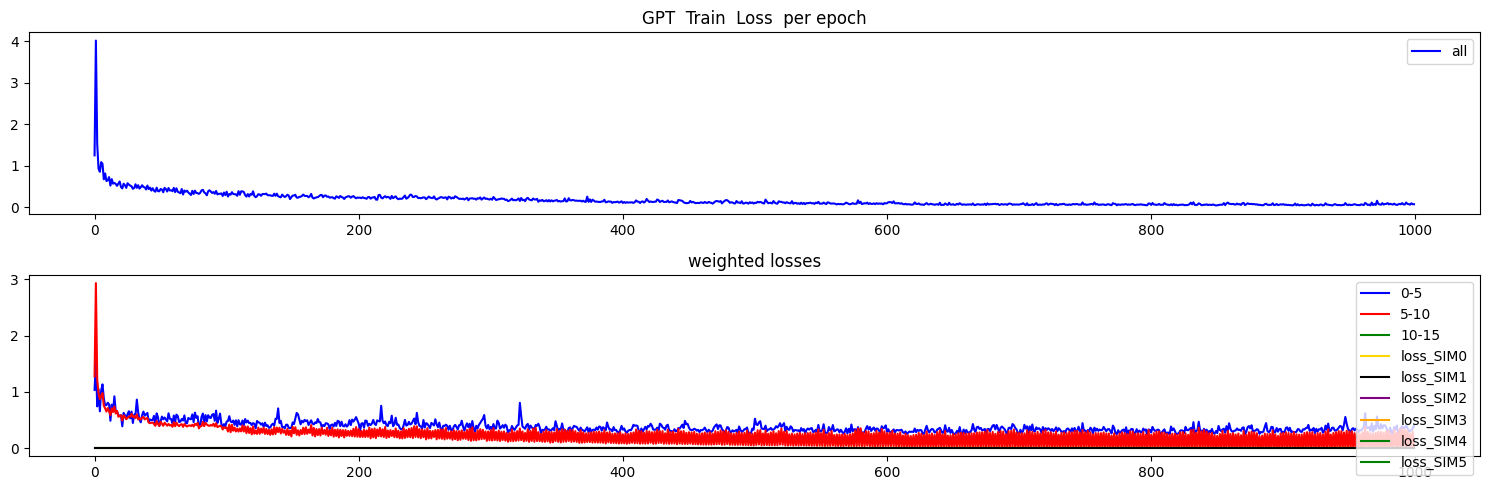

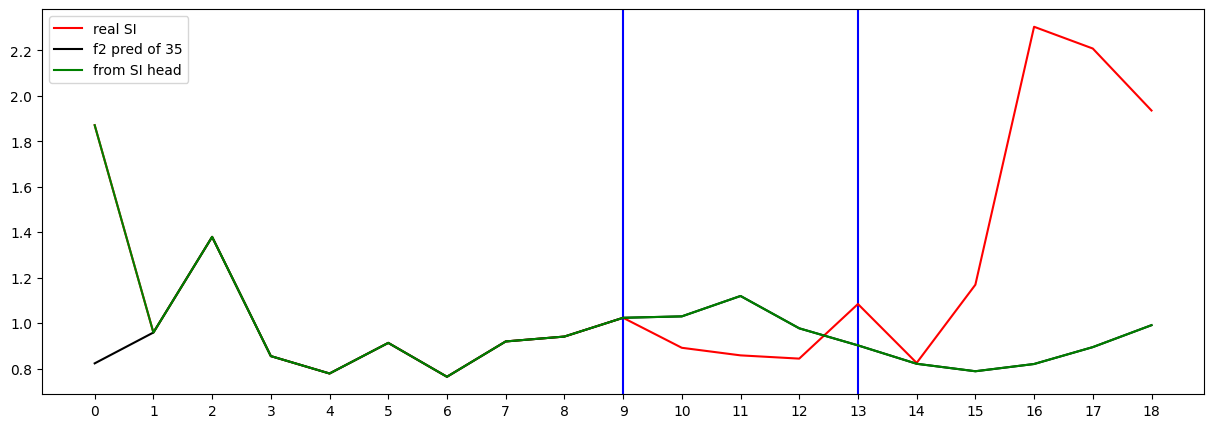

Testing R**2 - (all) - (no inputs):  0.8510214781310024
Testing R**2 - (f2) - SI full (no inputs):  -1.0821836073580124
Testing R**2 - SI head only (no inputs):  -1.0821836073580124
0 ...index R**2 (no inputs):  -0.2195635829457423
1 ...index R**2 (no inputs):  -0.5960647103872181
2 ...index R**2 (no inputs):  -1.0821836073580124
3 ...index R**2 (no inputs):  -0.15941742903289535
4 ...index R**2 (no inputs):  -0.5229752542763528
5 ...index R**2 (no inputs):  -0.20944774977293368
6 ...index R**2 (no inputs):  -0.4938198042271702
7 ...index R**2 (no inputs):  0.001149764457746394
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.266792140930435
10 ...index R**2 (no inputs):  -0.49501263133631435
11 ...index R**2 (no inputs):  -87.41724472893526
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7432706634473623
16 ...index R**2 (no inputs):  -0.17312132297200922
17 ...index R**2 (no i

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.181466
Loss_SI: 1.3791859149932861 Loss_all: 1.0821574926376343
===
[200] Train Loss: 0.068279
Loss_SI: 0.6585902571678162 Loss_all: 0.37624913454055786
===
[400] Train Loss: 0.035644
Loss_SI: 0.6090219616889954 Loss_all: 0.3442970812320709
===
[600] Train Loss: 0.037646
Loss_SI: 0.5073114037513733 Loss_all: 0.3457401692867279
===
[800] Train Loss: 0.016562
Loss_SI: 0.46797752380371094 Loss_all: 0.30571192502975464
===


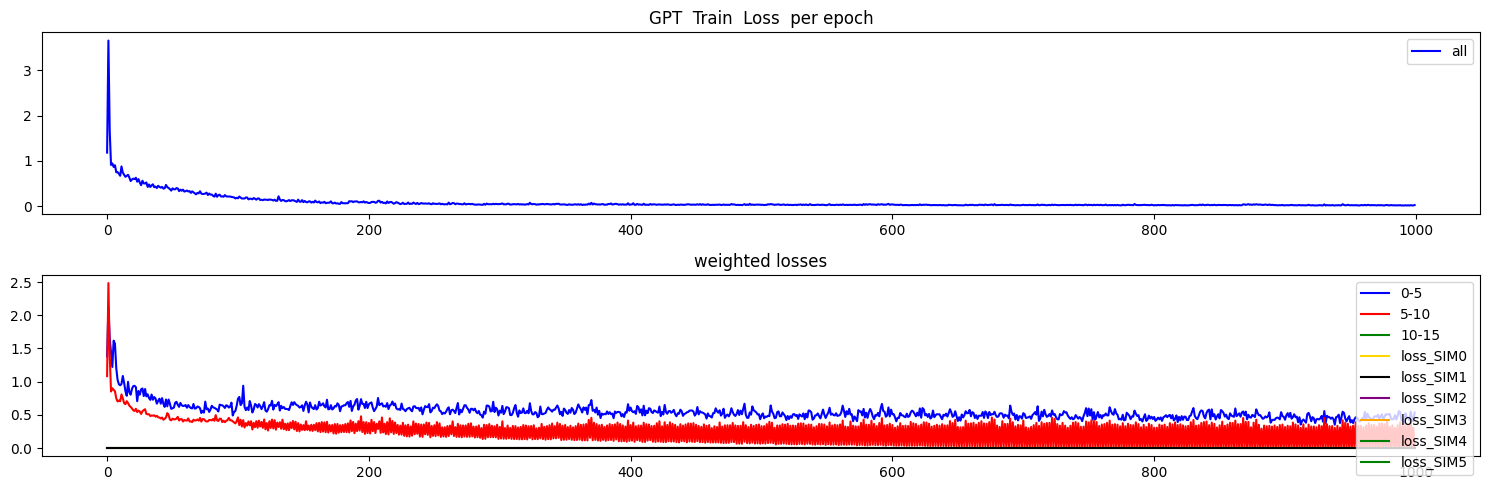

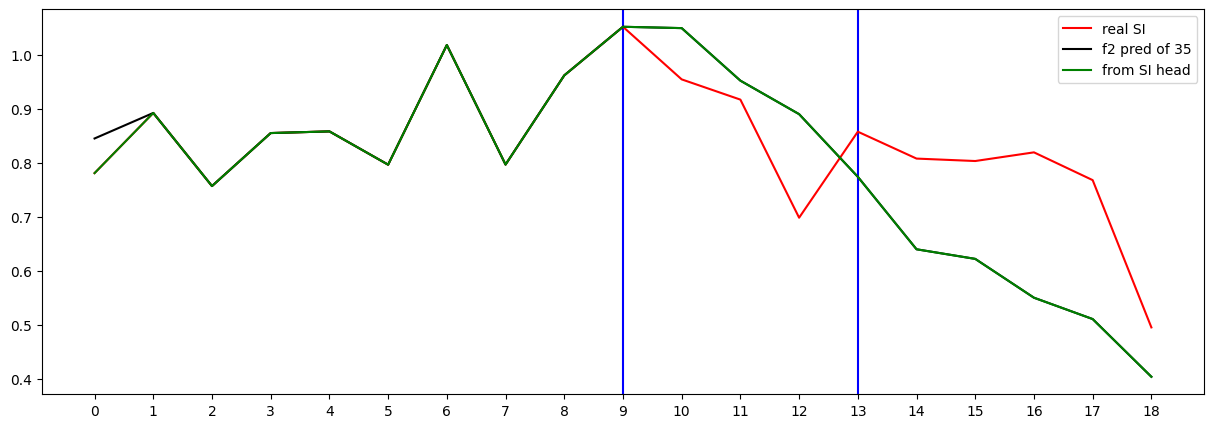

Testing R**2 - (all) - (no inputs):  0.9918054958791783
Testing R**2 - (f2) - SI full (no inputs):  -1.9534373935232385
Testing R**2 - SI head only (no inputs):  -1.9534373935232385
0 ...index R**2 (no inputs):  0.07324044152239095
1 ...index R**2 (no inputs):  -0.13533483647790145
2 ...index R**2 (no inputs):  -1.9534373935232385
3 ...index R**2 (no inputs):  -36.38635726860263
4 ...index R**2 (no inputs):  -1.0029165479477316
5 ...index R**2 (no inputs):  -24.176049504789002
6 ...index R**2 (no inputs):  -71.61316796407542
7 ...index R**2 (no inputs):  -582.9945287412327
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05215658389399924
10 ...index R**2 (no inputs):  -0.46147460509355964
11 ...index R**2 (no inputs):  -49.44126494904369
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5775908676418324
16 ...index R**2 (no inputs):  -1.2784775741240537
17 ...index R**2 (no input

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.131347
Loss_SI: 1.2275822162628174 Loss_all: 1.1846727132797241
===
[200] Train Loss: 0.151355
Loss_SI: 0.33485040068626404 Loss_all: 0.3300892412662506
===
[400] Train Loss: 0.069732
Loss_SI: 0.4472588002681732 Loss_all: 0.3742336630821228
===
[600] Train Loss: 0.034409
Loss_SI: 0.35514846444129944 Loss_all: 0.2913740873336792
===
[800] Train Loss: 0.036250
Loss_SI: 0.2671010494232178 Loss_all: 0.30248361825942993
===


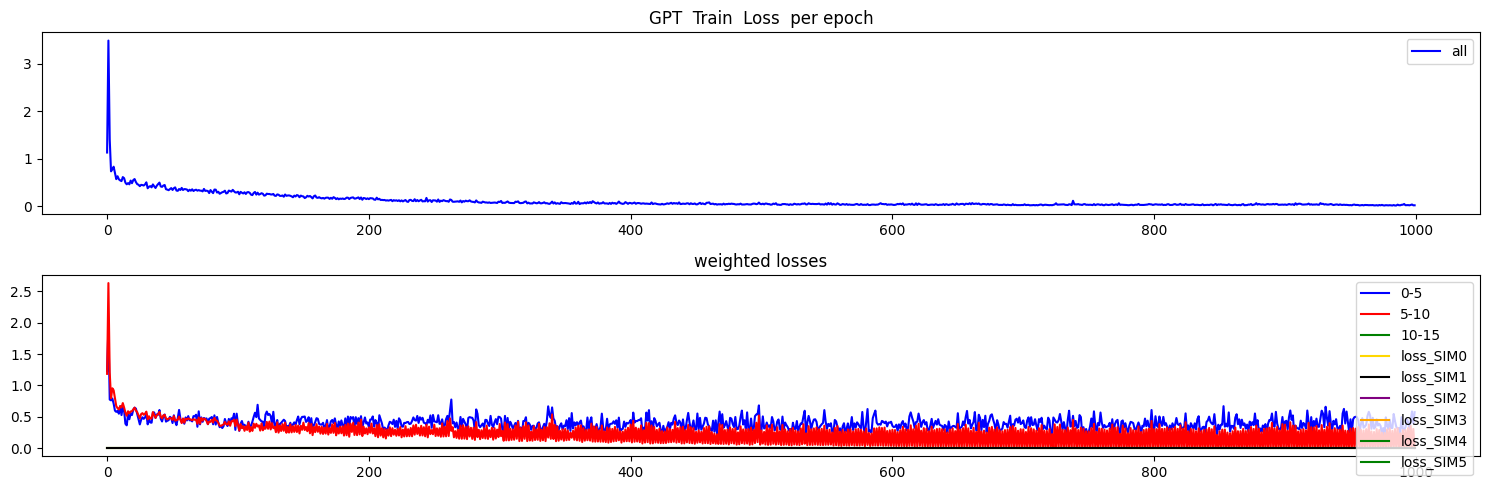

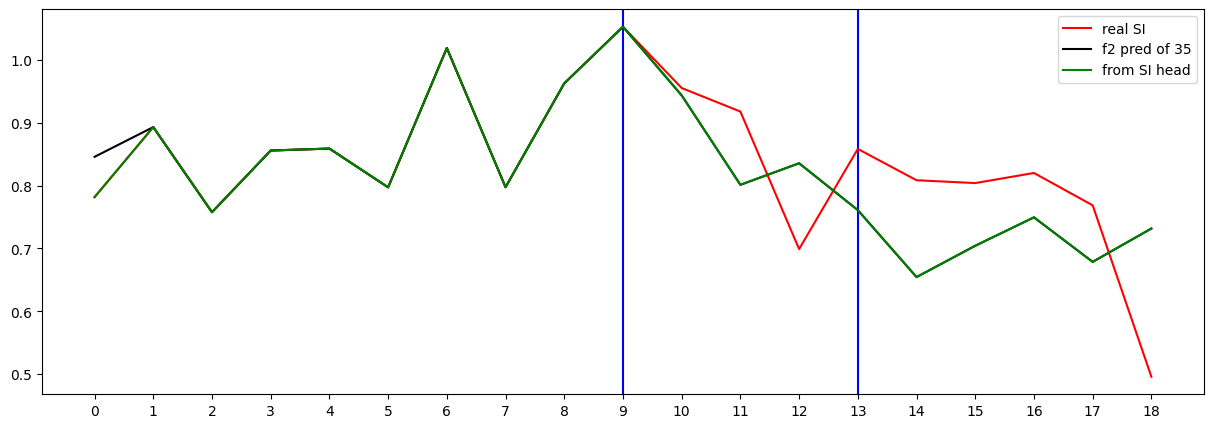

Testing R**2 - (all) - (no inputs):  0.998105283726532
Testing R**2 - (f2) - SI full (no inputs):  0.25297540620002645
Testing R**2 - SI head only (no inputs):  0.25297540620002645
0 ...index R**2 (no inputs):  0.42077668974547366
1 ...index R**2 (no inputs):  -0.7278425407246429
2 ...index R**2 (no inputs):  0.25297540620002645
3 ...index R**2 (no inputs):  -6.9829978142265
4 ...index R**2 (no inputs):  -49.9269713785441
5 ...index R**2 (no inputs):  -4.638691055532375
6 ...index R**2 (no inputs):  -50.22523366621521
7 ...index R**2 (no inputs):  -1140.3655325562831
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.009419923580114786
10 ...index R**2 (no inputs):  -0.022586209930293588
11 ...index R**2 (no inputs):  -166.63983697255577
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.05681513184343889
16 ...index R**2 (no inputs):  0.4177033819701107
17 ...index R**2 (no inputs):  

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.052497
Loss_SI: 1.385823130607605 Loss_all: 1.151538372039795
===
[200] Train Loss: 0.184477
Loss_SI: 0.39695143699645996 Loss_all: 0.307769238948822
===
[400] Train Loss: 0.071256
Loss_SI: 0.23161688446998596 Loss_all: 0.28644296526908875
===
[600] Train Loss: 0.056109
Loss_SI: 0.22253265976905823 Loss_all: 0.23519054055213928
===
[800] Train Loss: 0.039388
Loss_SI: 0.20603060722351074 Loss_all: 0.2730471193790436
===


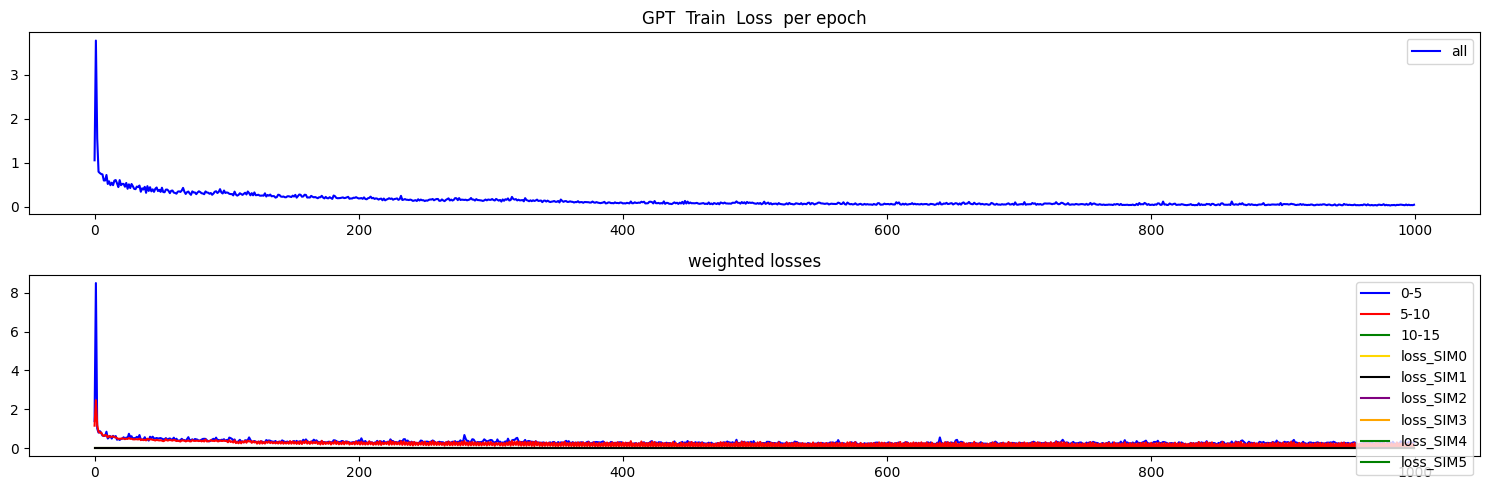

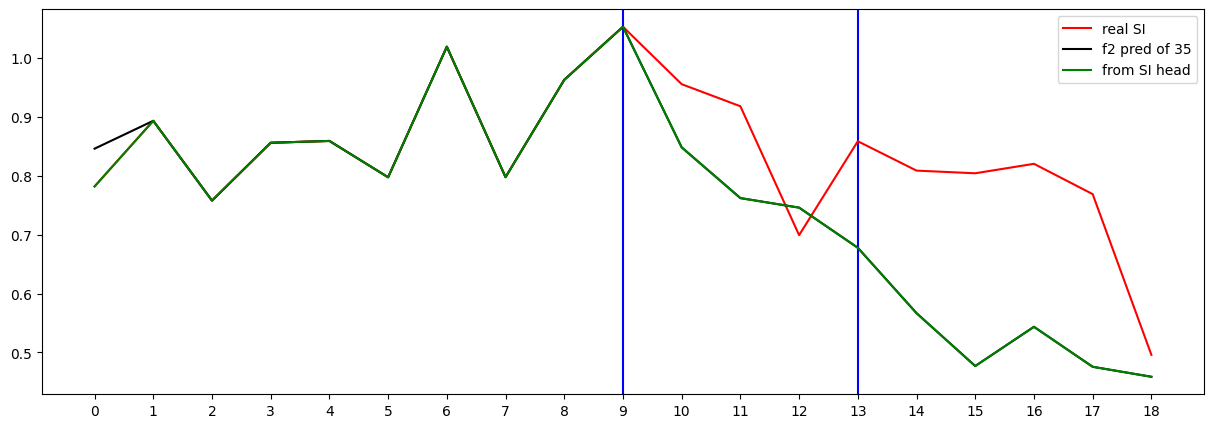

Testing R**2 - (all) - (no inputs):  0.9885075868507467
Testing R**2 - (f2) - SI full (no inputs):  -2.2010261936183038
Testing R**2 - SI head only (no inputs):  -2.2010261936183038
0 ...index R**2 (no inputs):  0.0745610250759593
1 ...index R**2 (no inputs):  0.3913303497341567
2 ...index R**2 (no inputs):  -2.2010261936183038
3 ...index R**2 (no inputs):  -3.5224579109212764
4 ...index R**2 (no inputs):  -31.073589184014132
5 ...index R**2 (no inputs):  -34.24215257810422
6 ...index R**2 (no inputs):  -46.18013650980105
7 ...index R**2 (no inputs):  -906.7755867352083
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.43383960550192746
10 ...index R**2 (no inputs):  -0.15914071116797746
11 ...index R**2 (no inputs):  -100.33974270176844
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.379671631460136
16 ...index R**2 (no inputs):  -0.4179103852023096
17 ...index R**2 (no inputs): 

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.134444
Loss_SI: 1.1484613418579102 Loss_all: 1.211470365524292
===
[200] Train Loss: 0.228748
Loss_SI: 0.2750648856163025 Loss_all: 0.2913556396961212
===
[400] Train Loss: 0.112842
Loss_SI: 0.2610637843608856 Loss_all: 0.267586886882782
===
[600] Train Loss: 0.086630
Loss_SI: 0.32171136140823364 Loss_all: 0.24983790516853333
===
[800] Train Loss: 0.067499
Loss_SI: 0.2283255159854889 Loss_all: 0.22917594015598297
===


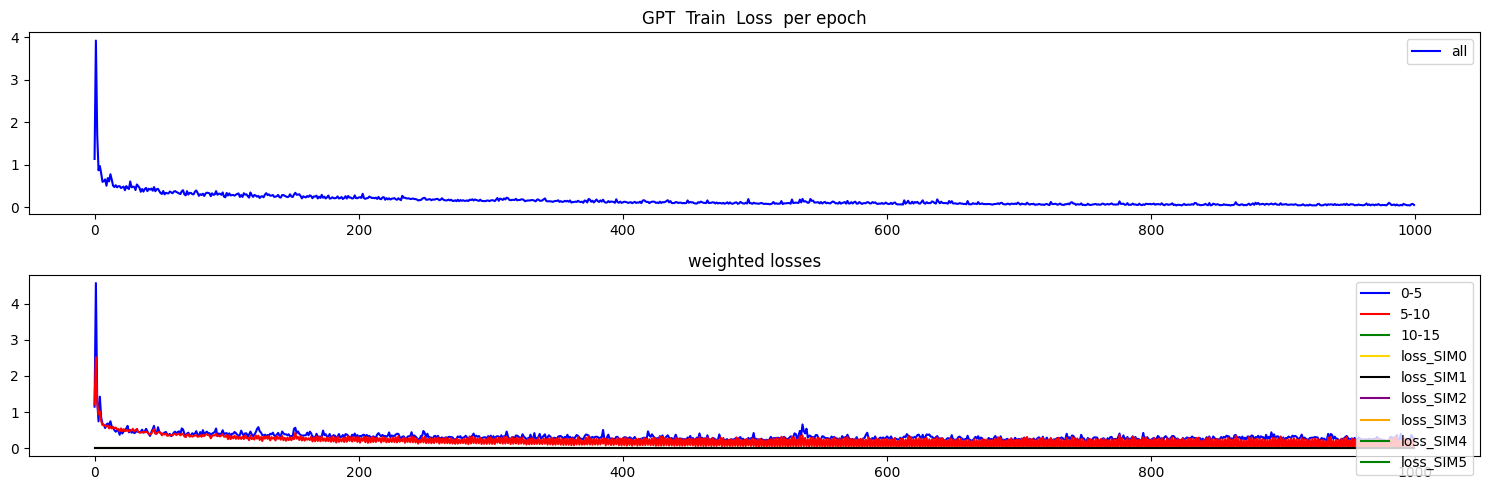

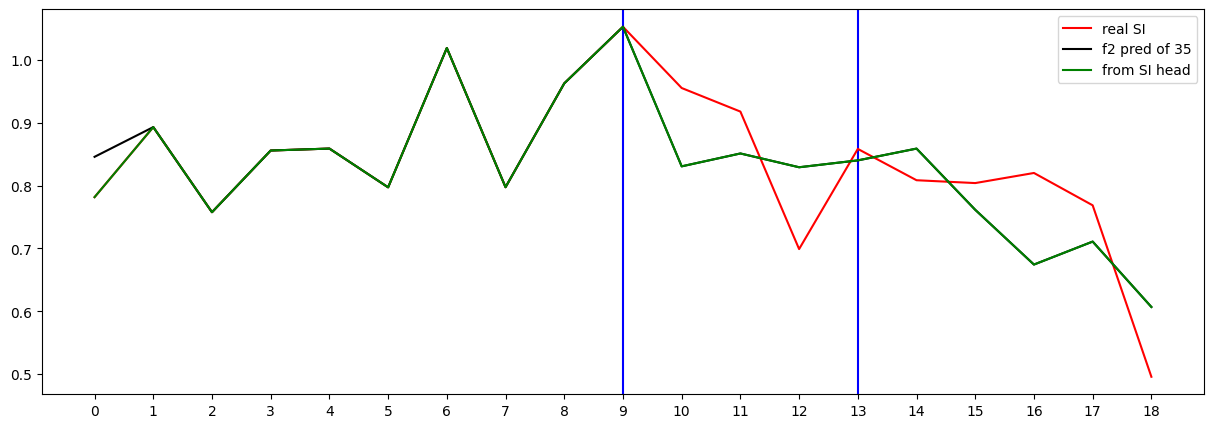

Testing R**2 - (all) - (no inputs):  0.9972555510993105
Testing R**2 - (f2) - SI full (no inputs):  -0.08376089823571431
Testing R**2 - SI head only (no inputs):  -0.08376089823571431
0 ...index R**2 (no inputs):  -0.6313537733715957
1 ...index R**2 (no inputs):  0.07420222499808382
2 ...index R**2 (no inputs):  -0.08376089823571431
3 ...index R**2 (no inputs):  -49.08235436065497
4 ...index R**2 (no inputs):  -49.6705487425027
5 ...index R**2 (no inputs):  -7.145768272578106
6 ...index R**2 (no inputs):  -3452.4283565396454
7 ...index R**2 (no inputs):  -66213.66252791228
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.2821412750491952
10 ...index R**2 (no inputs):  0.07200708782766108
11 ...index R**2 (no inputs):  -7.116766129803606
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5776829766476617
16 ...index R**2 (no inputs):  -0.7168415030245321
17 ...index R**2 (no inputs):

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.227105
Loss_SI: 1.3505691289901733 Loss_all: 1.2115992307662964
===
[200] Train Loss: 0.065083
Loss_SI: 0.3803795874118805 Loss_all: 0.2905745506286621
===
[400] Train Loss: 0.022244
Loss_SI: 0.36922487616539 Loss_all: 0.2580114006996155
===
[600] Train Loss: 0.027826
Loss_SI: 0.4789406955242157 Loss_all: 0.3229965567588806
===
[800] Train Loss: 0.019796
Loss_SI: 0.4543149471282959 Loss_all: 0.27359524369239807
===


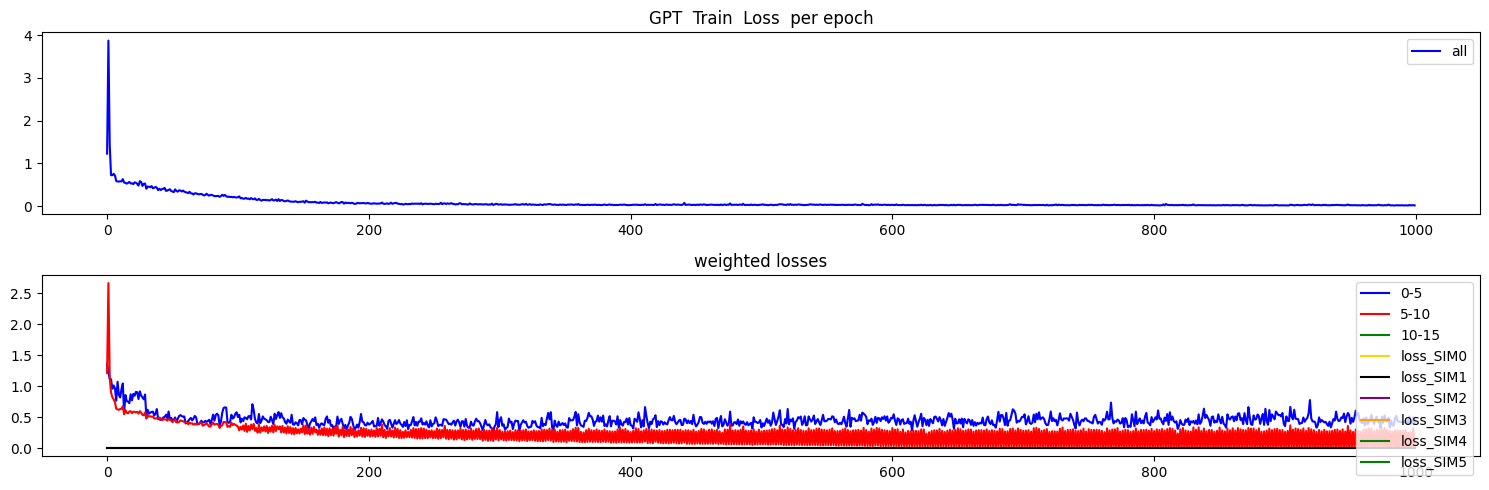

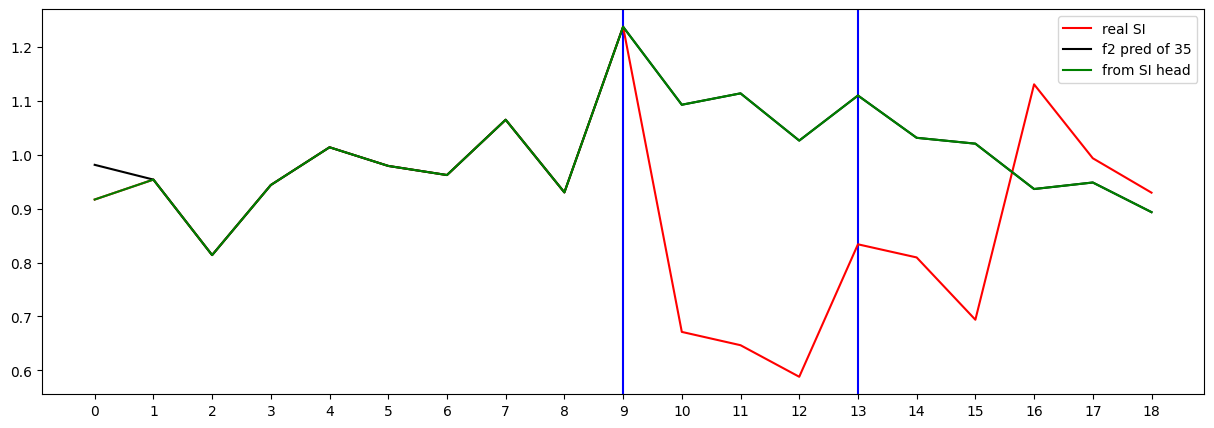

Testing R**2 - (all) - (no inputs):  0.8449863261977624
Testing R**2 - (f2) - SI full (no inputs):  -1.9904605057276137
Testing R**2 - SI head only (no inputs):  -1.9904605057276137
0 ...index R**2 (no inputs):  -0.08515473684696073
1 ...index R**2 (no inputs):  -2.694986856002996
2 ...index R**2 (no inputs):  -1.9904605057276137
3 ...index R**2 (no inputs):  -3.2399572839061985
4 ...index R**2 (no inputs):  -3.263822498009165
5 ...index R**2 (no inputs):  -3.812804724688462
6 ...index R**2 (no inputs):  -0.17398566207098032
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.514157242031291
10 ...index R**2 (no inputs):  -0.1921256051048057
11 ...index R**2 (no inputs):  -3.9261904308211575
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.0215748792819985
16 ...index R**2 (no inputs):  -1.6938299758396367
17 ...index R**2 (no inputs):  -5.989887601

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.194481
Loss_SI: 1.1537433862686157 Loss_all: 1.2750064134597778
===
[200] Train Loss: 0.106505
Loss_SI: 0.5893802642822266 Loss_all: 0.35879096388816833
===
[400] Train Loss: 0.047999
Loss_SI: 0.3288990557193756 Loss_all: 0.296517014503479
===
[600] Train Loss: 0.032556
Loss_SI: 0.3929341733455658 Loss_all: 0.33883988857269287
===
[800] Train Loss: 0.037449
Loss_SI: 0.5068725943565369 Loss_all: 0.35703709721565247
===


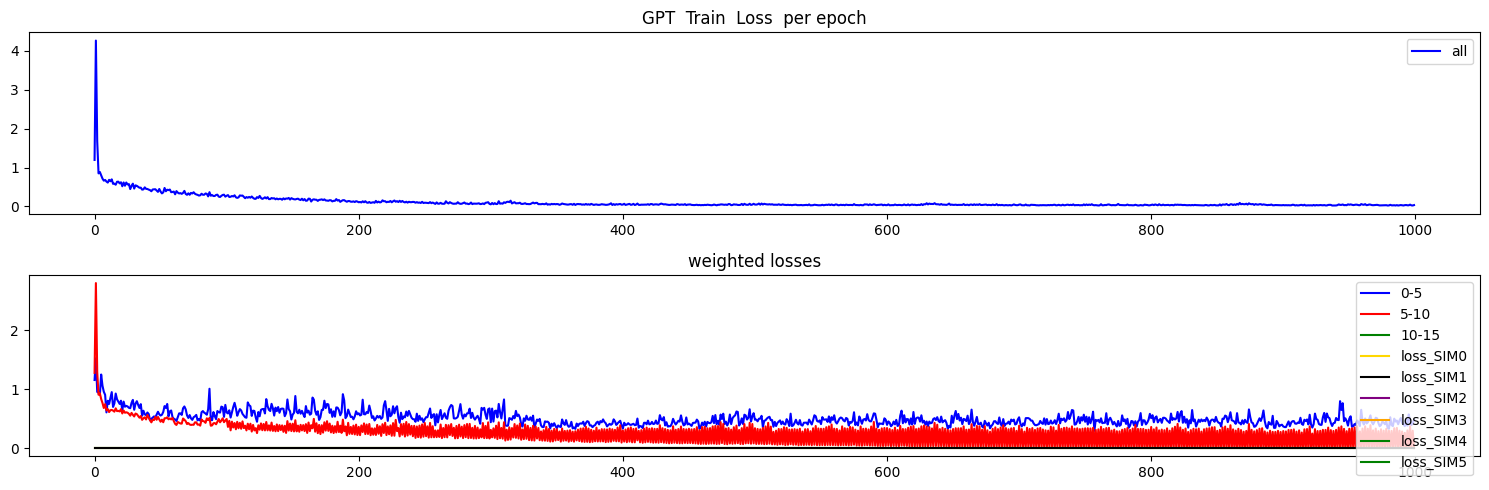

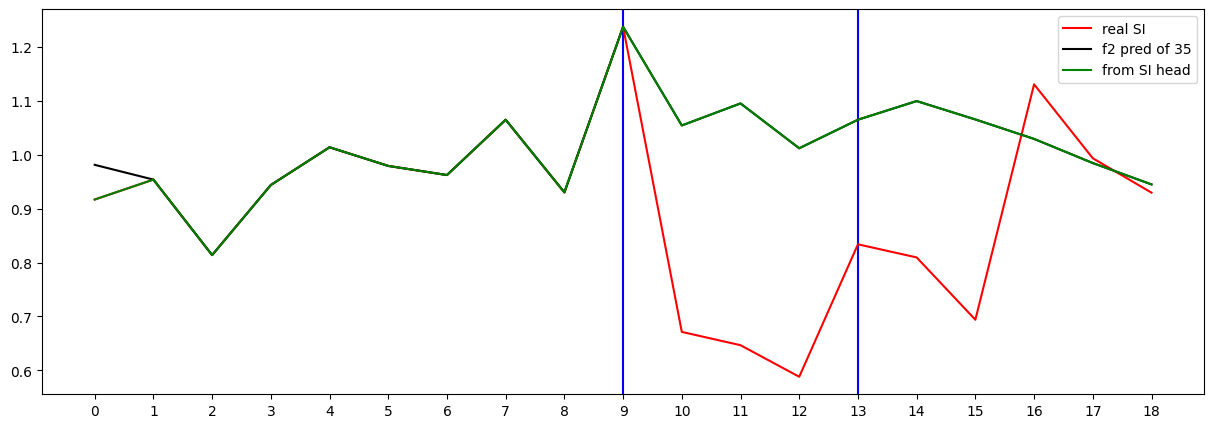

Testing R**2 - (all) - (no inputs):  0.8453943373330386
Testing R**2 - (f2) - SI full (no inputs):  -1.832830834955962
Testing R**2 - SI head only (no inputs):  -1.832830834955962
0 ...index R**2 (no inputs):  -0.24154195099930886
1 ...index R**2 (no inputs):  -0.9139176654352166
2 ...index R**2 (no inputs):  -1.832830834955962
3 ...index R**2 (no inputs):  -2.927794326914666
4 ...index R**2 (no inputs):  -3.9176264068771003
5 ...index R**2 (no inputs):  -3.8008837867142713
6 ...index R**2 (no inputs):  -0.23966157838070767
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08652895355963275
10 ...index R**2 (no inputs):  -0.4666156401107837
11 ...index R**2 (no inputs):  -4.983757738591122
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7333446763576361
16 ...index R**2 (no inputs):  -1.8115103117185871
17 ...index R**2 (no inputs):  -56.48952799

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.204160
Loss_SI: 1.263816237449646 Loss_all: 1.1965906620025635
===
[200] Train Loss: 0.211717
Loss_SI: 0.37790319323539734 Loss_all: 0.3043006956577301
===
[400] Train Loss: 0.055569
Loss_SI: 0.4216810166835785 Loss_all: 0.250959575176239
===
[600] Train Loss: 0.053140
Loss_SI: 0.3217289447784424 Loss_all: 0.22977964580059052
===
[800] Train Loss: 0.043365
Loss_SI: 0.39475828409194946 Loss_all: 0.2787682116031647
===


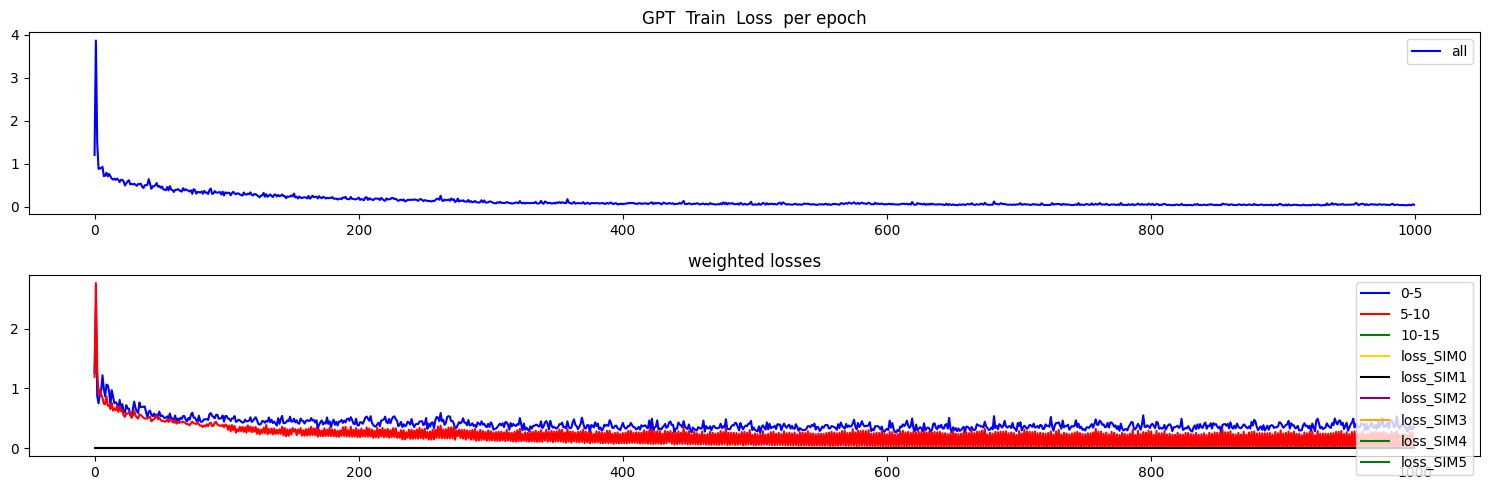

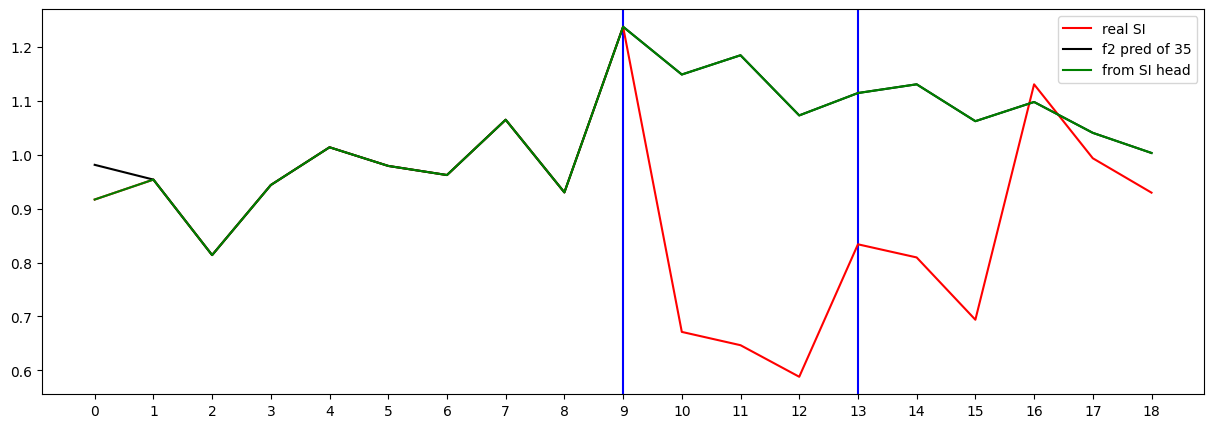

Testing R**2 - (all) - (no inputs):  0.8087358862382055
Testing R**2 - (f2) - SI full (no inputs):  -3.0161138974940798
Testing R**2 - SI head only (no inputs):  -3.0161138974940798
0 ...index R**2 (no inputs):  -0.662654414358669
1 ...index R**2 (no inputs):  -2.765096363794875
2 ...index R**2 (no inputs):  -3.0161138974940798
3 ...index R**2 (no inputs):  -4.317866234655763
4 ...index R**2 (no inputs):  -3.931240271701175
5 ...index R**2 (no inputs):  -4.94500916071127
6 ...index R**2 (no inputs):  -0.16916322063647704
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.39506294991161117
10 ...index R**2 (no inputs):  -0.33271773256264714
11 ...index R**2 (no inputs):  -2.0302953548811797
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.328766541278735
16 ...index R**2 (no inputs):  -3.9239459851027414
17 ...index R**2 (no inputs):  -42.3577126934

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.273431
Loss_SI: 1.1587426662445068 Loss_all: 1.2232224941253662
===
[200] Train Loss: 0.186361
Loss_SI: 0.2788431644439697 Loss_all: 0.2925921678543091
===
[400] Train Loss: 0.116518
Loss_SI: 0.30874672532081604 Loss_all: 0.26996883749961853
===
[600] Train Loss: 0.051477
Loss_SI: 0.22103090584278107 Loss_all: 0.2215810865163803
===
[800] Train Loss: 0.057473
Loss_SI: 0.32208186388015747 Loss_all: 0.2724541127681732
===


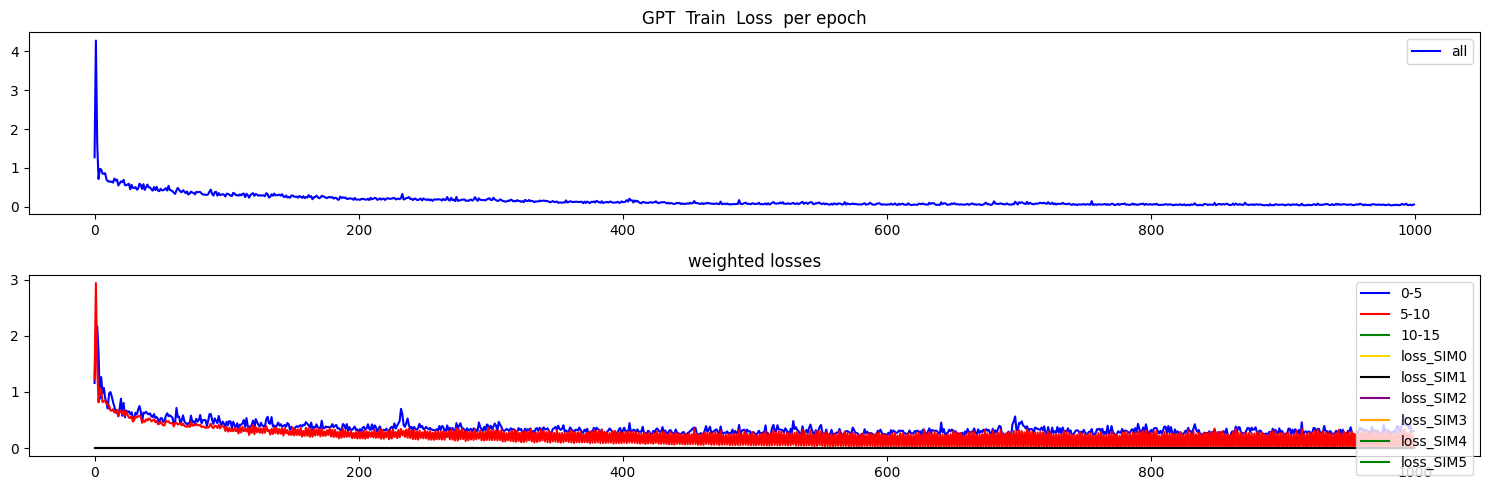

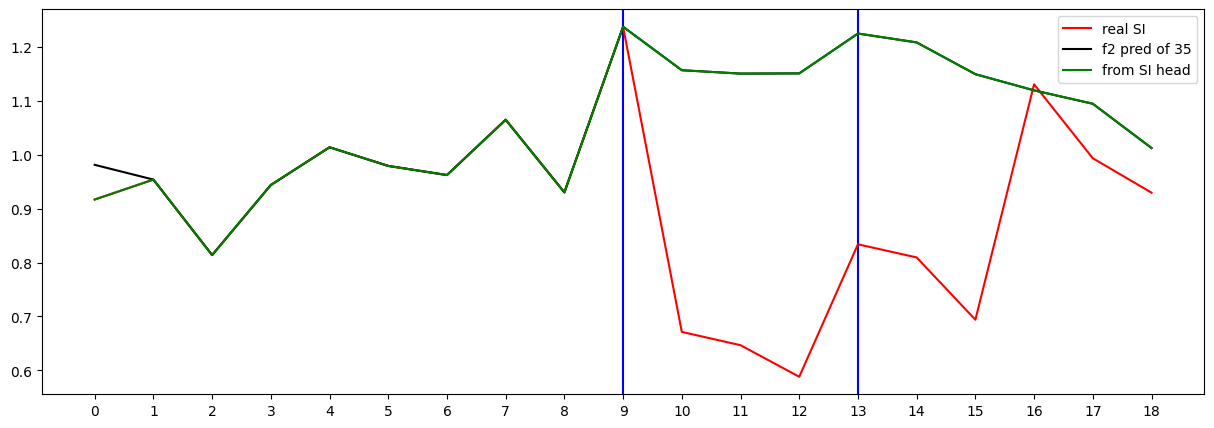

Testing R**2 - (all) - (no inputs):  0.7961074237278367
Testing R**2 - (f2) - SI full (no inputs):  -3.761101621483066
Testing R**2 - SI head only (no inputs):  -3.761101621483066
0 ...index R**2 (no inputs):  -0.4303538229228203
1 ...index R**2 (no inputs):  -5.552515723163378
2 ...index R**2 (no inputs):  -3.761101621483066
3 ...index R**2 (no inputs):  -2.7965907865577484
4 ...index R**2 (no inputs):  -4.048023737566389
5 ...index R**2 (no inputs):  -5.333194329979706
6 ...index R**2 (no inputs):  -0.2272782704855909
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7330996281135647
10 ...index R**2 (no inputs):  -0.19033612318143445
11 ...index R**2 (no inputs):  -15.75211309435516
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.1149286106672833
16 ...index R**2 (no inputs):  -3.8920110743481615
17 ...index R**2 (no inputs):  -22.440175313502

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.030493444845175688


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.06983293265353085


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.13178000847359894


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.16418169132346105



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -6.239654253774907
Naive_R2:....................................R²: -2.0307
RMSE:0.3068,MAE:0.2495,MASE:1.5102
1 .......................R² on just step n - R²: -6.239654253774907
Naive_R2:....................................R²: -2.0307
RMSE:0.3068,MAE:0.2495,MASE:1.5102
2 .....................R² on first n steps - R²: -4.616775890026555
Naive_R2:....................................R²: -2.9914
RMSE:0.2826,MAE:0.2188,MASE:1.8200
2 .......................R² on just step n - R²: -3.665214094523442
Naive_R2:....................................R²: -1.2389
RMSE:0.2561,MAE:0.1882,MASE:1.0548
3 .....................R² on first n steps - R²: -2.606270709213873
Naive_R2:....................................R²: -1.4524
RMSE:0.2408,MAE:0.1757,MASE:1.3187
3 .......................R² on just step n - R²: 0.1179963683803199
Naive_R2:....................................R²: 0.6710
RMSE:0.1192,MAE:0.0895,MASE:0.4441
4 .....................R² on first n step

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: -1.8486737233977601
Naive_R2:....................................R²: -0.1925
RMSE:0.1924,MAE:0.1425,MASE:0.8628
1 .......................R² on just step n - R²: -1.8486737233977601
Naive_R2:....................................R²: -0.1925
RMSE:0.1924,MAE:0.1425,MASE:0.8628
2 .....................R² on first n steps - R²: -2.012575948890691
Naive_R2:....................................R²: -1.1408
RMSE:0.2070,MAE:0.1410,MASE:1.1724
2 .......................R² on just step n - R²: -2.4582520456280554
Naive_R2:....................................R²: -0.6596
RMSE:0.2205,MAE:0.1394,MASE:0.7814
3 .....................R² on first n steps - R²: -1.1782285997847972
Naive_R2:....................................R²: -0.4813
RMSE:0.1871,MAE:0.1314,MASE:0.9864
3 .......................R² on just step n - R²: -0.2031340492304179
Naive_R2:....................................R²: 0.5512
RMSE:0.1393,MAE:0.1124,MASE:0.5575
4 .....................R² on first n

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -2.9916726238657225
Naive_R2:....................................R²: -0.6710
RMSE:0.2278,MAE:0.1608,MASE:0.9731
1 .......................R² on just step n - R²: -2.9916726238657225
Naive_R2:....................................R²: -0.6710
RMSE:0.2278,MAE:0.1608,MASE:0.9731
2 .....................R² on first n steps - R²: -3.0901095463637303
Naive_R2:....................................R²: -1.9065
RMSE:0.2412,MAE:0.1585,MASE:1.3179
2 .......................R² on just step n - R²: -3.5804971187285455
Naive_R2:....................................R²: -1.1982
RMSE:0.2538,MAE:0.1562,MASE:0.8753
3 .....................R² on first n steps - R²: -2.075832344801409
Naive_R2:....................................R²: -1.0916
RMSE:0.2224,MAE:0.1578,MASE:1.1843
3 .......................R² on just step n - R²: -0.9880352013718776
Naive_R2:....................................R²: 0.2585
RMSE:0.1790,MAE:0.1565,MASE:0.7767
4 .....................R² on first n

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -3.629350435869326
Naive_R2:....................................R²: -0.9380
RMSE:0.2453,MAE:0.1881,MASE:1.1387
1 .......................R² on just step n - R²: -3.629350435869326
Naive_R2:....................................R²: -0.9380
RMSE:0.2453,MAE:0.1881,MASE:1.1387
2 .....................R² on first n steps - R²: -3.752047753051535
Naive_R2:....................................R²: -2.3769
RMSE:0.2599,MAE:0.1939,MASE:1.6127
2 .......................R² on just step n - R²: -4.329498064550585
Naive_R2:....................................R²: -1.5576
RMSE:0.2738,MAE:0.1997,MASE:1.1193
3 .....................R² on first n steps - R²: -2.2283357574491145
Naive_R2:....................................R²: -1.1954
RMSE:0.2278,MAE:0.1635,MASE:1.2267
3 .......................R² on just step n - R²: -0.2766261980393223
Naive_R2:....................................R²: 0.5238
RMSE:0.1435,MAE:0.1025,MASE:0.5088
4 .....................R² on first n st


## Plot


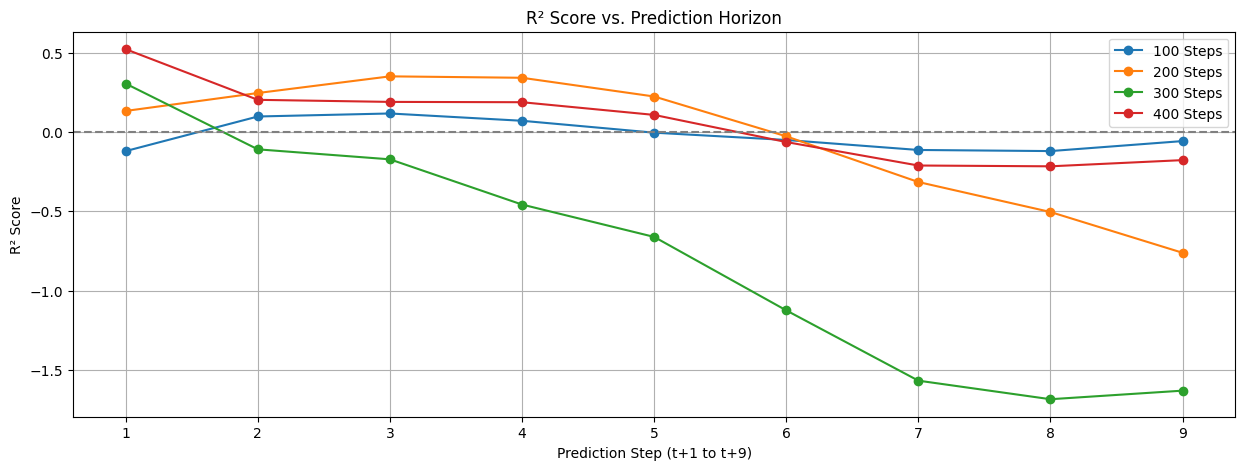

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
